## Figures in the Introduction Section

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.utils.random import sample_without_replacement
from imblearn.under_sampling import RandomUnderSampler

# create dataset
N = 100000
X, y = make_blobs(
    n_samples=N, n_features=2, centers=[[0, 0]], cluster_std=3, random_state=2
)
mins = X.min(axis=0)
maxs = X.max(axis=0)


def add_noise(X, y):
    X2 = np.random.rand(int(N * 0.2), 2)
    y2 = np.full(int(N * 0.2), -1)
    X2[:, 0] = (X2[:, 0] * (maxs[0] - mins[0])) + mins[0]
    X2[:, 1] = (X2[:, 1]) * (maxs[1] - mins[1]) + mins[1]

    X_ = np.concatenate([X, X2], axis=0)
    y_ = np.concatenate([y, y2], axis=0)
    return X_, y_


X, y = add_noise(X, y)


def cluster(X, y):
    clustering = DBSCAN(eps=0.32, min_samples=100).fit(X)
    c = clustering.labels_
    return c


def to_df(X, y):
    df = pd.DataFrame(X, columns=["A, B"])
    df["y"] = y
    return df


def draw_uniform_sample(X, y, n_sample: int):
    # shuffle the input data
    random = np.random.rand(len(X))
    random_order = np.argsort(random)
    X_ = X[random_order]

    # draw random sample
    sample = sample_without_replacement(
        n_population=len(X_), n_samples=n_sample, random_state=0
    )

    return to_df(X[sample], y[sample])


def draw_inlier_sample(X, y, n_sample: int):
    # dbscan: -1 is outlier, so inlier is > -1
    c = cluster(X, y)
    c = (c > -1).astype(int)

    # in case there are more than n_sample inliers, sample down uniformly
    return draw_uniform_sample(X[c == 1], c[c == 1], n_sample=n_sample)


def draw_stratified_sample(X, y, n_sample: int):
    c = cluster(X, y)
    c = (c > -1).astype(int)

    # clustering might find more than 2 clusters, but all we need is inlier/outliere(int)

    rus = RandomUnderSampler()
    X_, y_ = rus.fit_resample(X, c)
    return draw_uniform_sample(X_, y_, n_sample=n_sample)


def draw_noise_sample(X, y, n_sample: int):
    c = cluster(X, y)
    c = (c > -1).astype(int)

    return draw_uniform_sample(X[y == -1], c[y == -1], n_sample)


def draw_outlier_sample(X, y, n_sample: int):
    # dbscan: -1 is outlier, so inlier is > -1
    c = cluster(X, y).astype(int)

    return draw_uniform_sample(X[c == -1], c[c == -1], n_sample)


In [7]:
import os, sys
sys.path.append(f"{os.getcwd()}/../")

from pipeline.Pipeline import Pipeline
from linearizations.Linearization import *


# noise sampling
noise_config = {
  "data": "test",
  "linearization": "numeric",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 2,
  "params": {
    "subspace": [0, 1]
  }
}

# stratified sampling
stratified_config = {
  "data": "test",
  "linearization": "numeric",
  "subdivision": "cohesion",
  "selection": "random",
  "dimension": 2,
  "params": {
    "subspace": [0, 1]
  }
}

# outlier sampling
outlier_config = {
  "data": "test",
  "linearization": "numeric",
  "subdivision": "cardinality",
  "selection": "minimum",
  "dimension": 2,
  "params": {
    "subspace": [0, 1]
  }
}

# uniform sampling
uniform_config = {
  "data": "test",
  "linearization": "numeric",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 2,
  "params": {
    "subspace": [0, 1]
  }
}

noise_pl = Pipeline(noise_config)
stratified_pl = Pipeline(stratified_config)
outlier_pl = Pipeline(outlier_config)
uniform_pl = Pipeline(uniform_config)

preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing


In [6]:
import pandas as pd

pd.read_csv("./linearization_files/testLinearizationRandom.csv", sep=";", names=["A", "B", "y"])

A         B    y
0       136478.0  0.839385  0.0
1       189276.0  3.600026  0.0
2        97429.0 -2.591145  0.0
3       151040.0 -0.326331  0.0
4       135080.0 -7.176725 -1.0
...          ...       ...  ...
199995  178082.0 -1.245067  0.0
199996    1705.0 -0.790083  0.0
199997  177131.0 -1.232019  0.0
199998    5286.0  7.273714 -1.0
199999   78645.0 -5.256002  0.0

[200000 rows x 3 columns]

### Plot full dataset

(-12.48393401358247, 14.190341438793237)

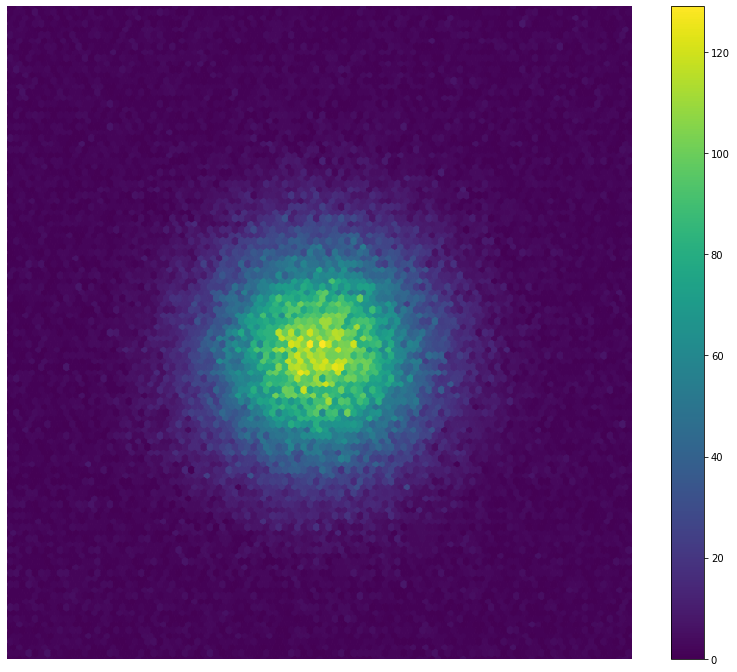

In [4]:
df = pd.DataFrame(X, columns=["A, B"])
plt = df.plot.hexbin(
  x='A',
  y='B',
  reduce_C_function=np.sum,
  gridsize=100,
  cmap="viridis",
  figsize=[14, 12],
)

plt.axis("off")
plt.set_xlim([mins[0], maxs[0]])
plt.set_ylim([mins[1], maxs[1]])

### Plot different sampling tasks on that dataset

Adjust the first lines to draw a different sample.

(-12.48393401358247, 14.190341438793237)

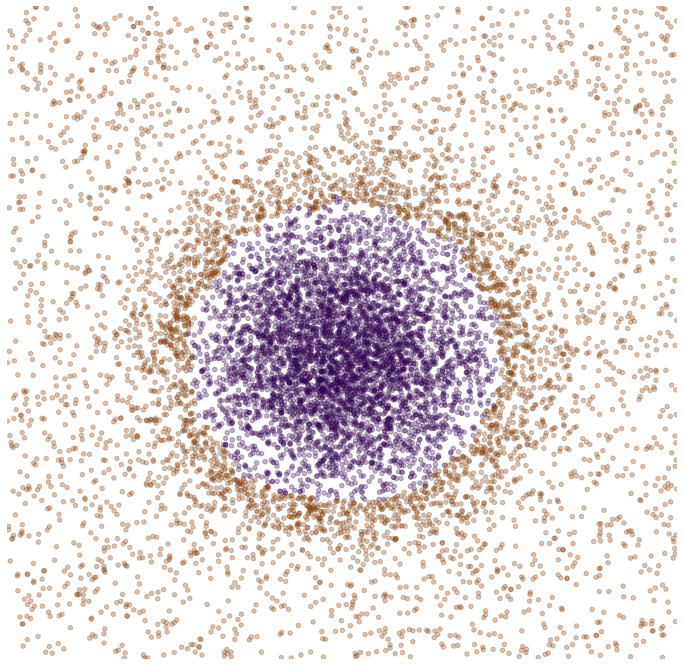

In [3]:
# plot a sampling
# df = draw_noise_sample(X, y, 10000)
df = draw_stratified_sample(X, y, 10000)
# df = draw_outlier_sample(X, y, 10000)
# df = draw_inlier_sample(X, y, 10000)
# df = draw_uniform_sample(X, y, 10000)

plt = df.plot.scatter(
  x="A", 
  y="B", 
  # c="#2f124b", 
  c="y",
  colormap="PuOr", 
  alpha=0.3, 
  figsize=[12, 12], 
  colorbar=False,
)

plt.axis("off")
plt.set_xlim([mins[0], maxs[0]])
plt.set_ylim([mins[1], maxs[1]])

## Figures in the Use Case Section

### Tailoring towards attributes of different data types in the same dataset

Below, we demonstrate how tailoring linearization and subdivision steps of the pipeline towards particular attributes allows tailoring the sampling towards different user interests.

The pipelines:

In [24]:
import os, sys
sys.path.append(f"{os.getcwd()}/../")

from pipeline.Pipeline import Pipeline

# focus on spatial attributes
config1 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 5,
  "params": {}
}

# focus on numerical attributes
config2 = {
  "data": "taxis",
  "linearization": "numeric",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [5]  # trip distance
  }
}

# focus on temporal attribute
config3 = {
  "data": "taxis",
  "linearization": "temporal",
  "subdivision": "stratified",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [2, 3]  # pickup and dropoff time
  }
}

pl1 = Pipeline(config1)
pl2 = Pipeline(config2)
pl3 = Pipeline(config3)

preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing


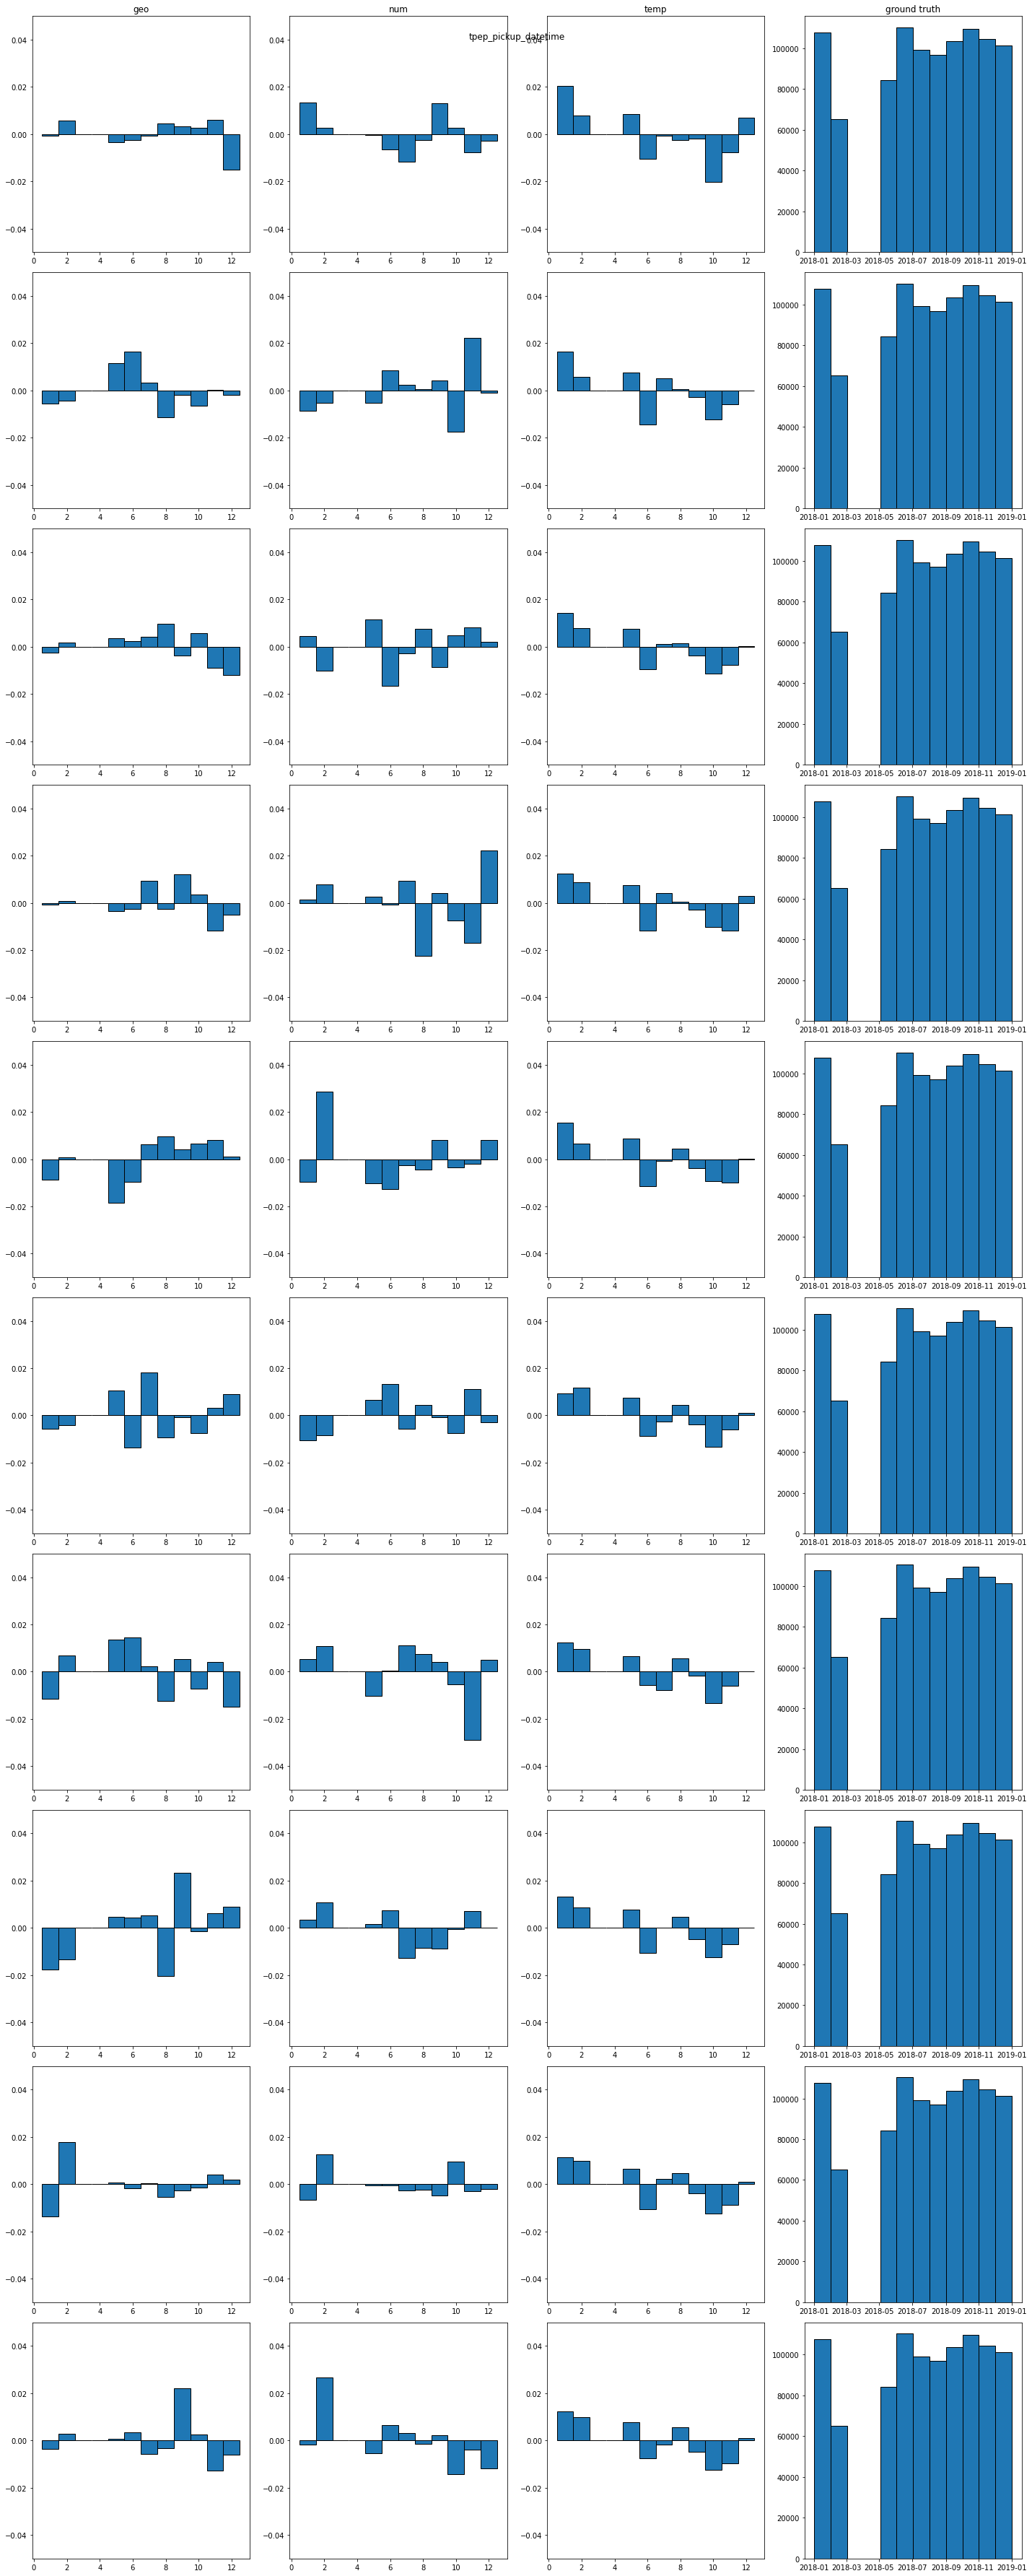

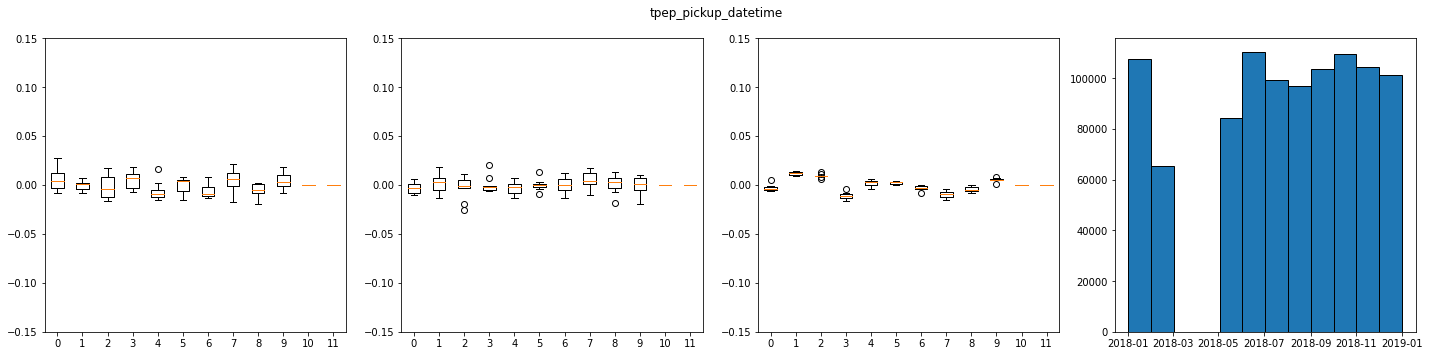

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def hist(sample_df: pd.Series, value_range: tuple, n_bins, ax: plt):
  return ax.hist(
    sample_df, 
    bins=n_bins,
    range=value_range,
    edgecolor='black', 
    linewidth=1
  )

def delta_hist(delta: pd.Series, ax: plt):
  return ax.bar(
    delta.index,
    delta,
    width=1,
    edgecolor='black', 
    linewidth=1,
  )

def delta_boxplot(delta: pd.Series, ax: plt):
  # print(delta)
  return ax.boxplot(
    delta,
    labels=delta.columns
  )


columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]


def plot_time_hist(attr: str):
  fig, ax = plt.subplots(n_chunks, 4, figsize=(20, n_chunks * 5))
  fig.suptitle(attr)
  date_range = ("2018-01-01 00:00:00", "2018-12-31 23:59:59")

  ground_truth_df = pd.to_datetime(pd.DataFrame(pl1.subdivision.linearization, columns=columns)[attr])
  gt_monthly_dist = ground_truth_df.dt.month.value_counts(normalize=True).sort_index()

  for i in range(n_chunks):
    chunk_geo = pd.to_datetime(pd.DataFrame(pl1.get_next_chunk(), columns=columns)[attr])
    chunk_num = pd.to_datetime(pd.DataFrame(pl2.get_next_chunk(), columns=columns)[attr])
    chunk_temp = pd.to_datetime(pd.DataFrame(pl3.get_next_chunk(), columns=columns)[attr])

    for j, df in enumerate([chunk_geo, chunk_num, chunk_temp]):
      monthly_dist = df.dt.month.value_counts(normalize=True).sort_index()

      delta = monthly_dist - gt_monthly_dist
      for k in range(1, 13):
        delta.loc[k] = delta.loc[k] if k in delta.index else 0

      ax[i][j].set_ylim(-0.05, 0.05)
      delta_hist(delta, ax[i][j])

    hist(ground_truth_df, date_range, 12, ax[i][3])

  for ax_, col in zip(ax[0], ["geo", "num", "temp", "ground truth"]):
    ax_.set_title(col)
  
  plt.tight_layout()
  plt.show()


def boxplot_time_summary(attr: str):
  fig, ax = plt.subplots(1, 4, figsize=(20, 5))
  fig.suptitle(attr)
  date_range = ("2018-01-01 00:00:00", "2018-12-31 23:59:59")

  ground_truth_df = pd.to_datetime(pd.DataFrame(pl1.subdivision.linearization, columns=columns)[attr])
  gt_monthly_dist = ground_truth_df.dt.month.value_counts(normalize=True).sort_index()

  delta_geo = pd.DataFrame()
  delta_num = pd.DataFrame()
  delta_temp = pd.DataFrame()
  delta_dfs = [delta_geo, delta_num, delta_temp]

  for i in range(n_chunks):
    chunk_geo = pd.to_datetime(pd.DataFrame(pl1.get_next_chunk(), columns=columns)[attr])
    chunk_num = pd.to_datetime(pd.DataFrame(pl2.get_next_chunk(), columns=columns)[attr])
    chunk_temp = pd.to_datetime(pd.DataFrame(pl3.get_next_chunk(), columns=columns)[attr])

    for j, df in enumerate([chunk_geo, chunk_num, chunk_temp]):
      monthly_dist = df.dt.month.value_counts(normalize=True).sort_index()

      delta = monthly_dist - gt_monthly_dist
      for k in range(1, 13):
        delta.loc[k] = delta.loc[k] if k in delta.index else 0
      
      delta_dfs[j] = pd.concat([delta_dfs[j], pd.DataFrame(delta.to_numpy().reshape(1, -1))], ignore_index=True)

  hist(ground_truth_df, date_range, 12, ax[3])
  
  for i, df in enumerate(delta_dfs):
    delta_boxplot(df, ax[i])
    ax[i].set_ylim(-0.15, 0.15)

  plt.tight_layout()
  plt.show()


n_chunks = 10
plot_time_hist("tpep_pickup_datetime")
boxplot_time_summary("tpep_pickup_datetime")

A conclusion from the above is that simply linearizing by a temporal dimension does not necessarily produce better results. 
In fact, the mean/median error between the three pipelines is more or less the same. 
What we observe instead is that the per-bin error of the `temp` case is consistent between chunks, while the distribution from the other two pipelines fluctuates.

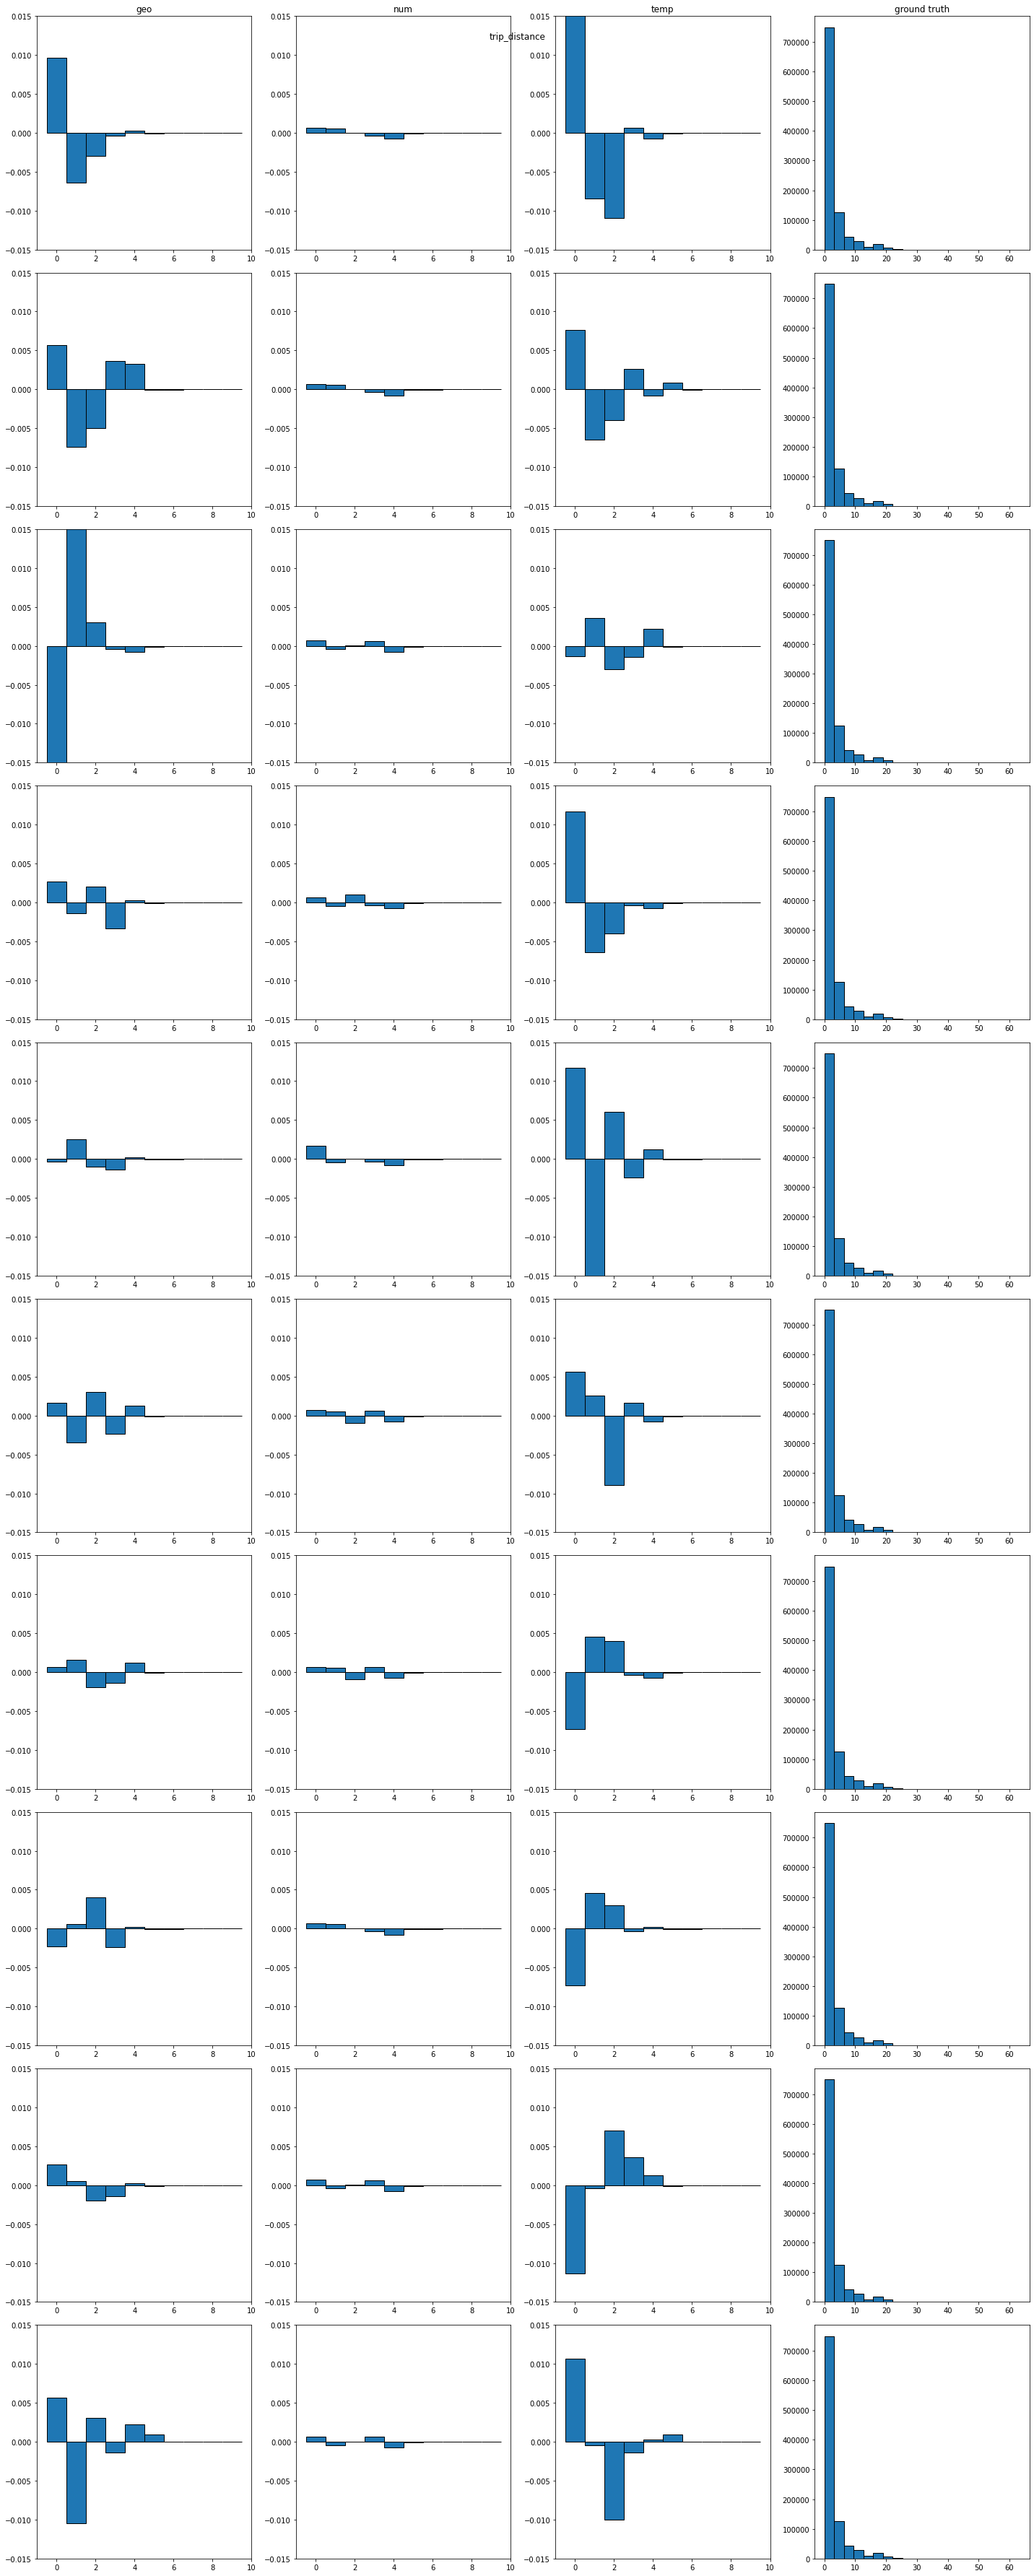

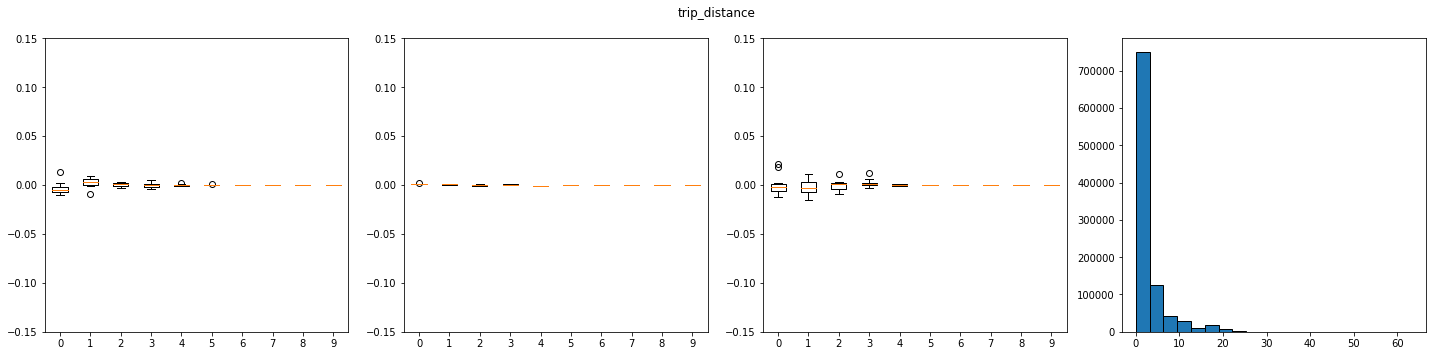

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def scatter(df: pd.DataFrame, range: list[int], ax: plt):
  return ax.scatter(
    x=df[df.columns[0]],
    y=df[df.columns[1]],
  )

def hist(sample_df: pd.Series, value_range: tuple, n_bins, ax: plt):
  return ax.hist(
    sample_df, 
    bins=n_bins,
    range=value_range,
    edgecolor='black', 
    linewidth=1
  )

def delta_hist(delta: pd.Series, ax: plt):
  return ax.bar(
    delta.index,
    delta,
    width=1,
    edgecolor='black', 
    linewidth=1,
  )


columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]


def plot_hist(attr: str):
  fig, ax = plt.subplots(n_chunks, 4, figsize=(20, n_chunks * 5))
  fig.suptitle(attr)

  n_bins = 10
  ground_truth_df = pd.DataFrame(pl1.subdivision.linearization, columns=columns)[attr]
  bins = np.linspace(ground_truth_df.min(), ground_truth_df.max(), n_bins+1)  # because arange does not include max

  gt_hist = np.histogram(ground_truth_df, bins=bins)
  gt_bins = gt_hist[0]
  gt_bins = gt_bins / gt_bins.sum()
  value_range = [ground_truth_df.min(), ground_truth_df.max()]

  for i in range(n_chunks):
    chunk_geo = pd.DataFrame(pl1.get_next_chunk(), columns=columns)[attr]
    chunk_num = pd.DataFrame(pl2.get_next_chunk(), columns=columns)[attr]
    chunk_temp = pd.DataFrame(pl3.get_next_chunk(), columns=columns)[attr]

    for j, df in enumerate([chunk_geo, chunk_num, chunk_temp]):
      df_bins = np.histogram(df, bins=bins)[0]
      df_bins = df_bins / df_bins.sum()

      delta_bins = df_bins - gt_bins
      ax[i][j].set_ylim(-0.015, 0.015)
      delta_hist(pd.Series(delta_bins), ax[i][j])

    hist(ground_truth_df, value_range, n_bins*2, ax[i][3])

  for ax_, col in zip(ax[0], ["geo", "num", "temp", "ground truth"]):
    ax_.set_title(col)
  
  plt.tight_layout()
  plt.show()

def boxplot_summary(attr: str):
  fig, ax = plt.subplots(1, 4, figsize=(20, 5))
  fig.suptitle(attr)

  n_bins = 10
  ground_truth_df = pd.DataFrame(pl1.subdivision.linearization, columns=columns)[attr]
  bins = np.linspace(ground_truth_df.min(), ground_truth_df.max(), n_bins+1)  # because arange does not include max

  gt_hist = np.histogram(ground_truth_df, bins=bins)
  gt_bins = gt_hist[0]
  gt_bins = gt_bins / gt_bins.sum()
  value_range = [ground_truth_df.min(), ground_truth_df.max()]

  delta_geo = pd.DataFrame()
  delta_num = pd.DataFrame()
  delta_temp = pd.DataFrame()
  delta_dfs = [delta_geo, delta_num, delta_temp]

  for i in range(n_chunks):
    chunk_geo = pd.DataFrame(pl1.get_next_chunk(), columns=columns)[attr]
    chunk_num = pd.DataFrame(pl2.get_next_chunk(), columns=columns)[attr]
    chunk_temp = pd.DataFrame(pl3.get_next_chunk(), columns=columns)[attr]

    for j, df in enumerate([chunk_geo, chunk_num, chunk_temp]):
      df_bins = np.histogram(df, bins=bins)[0]
      df_bins = df_bins / df_bins.sum()

      delta_bins = df_bins - gt_bins
      
      delta_dfs[j] = pd.concat([delta_dfs[j], pd.DataFrame(delta_bins.reshape(1, -1))], ignore_index=True)

  hist(ground_truth_df, value_range, n_bins * 2, ax[3])
  
  for i, df in enumerate(delta_dfs):
    delta_boxplot(df, ax[i])
    ax[i].set_ylim(-0.15, 0.15)

  plt.tight_layout()
  plt.show()

n_chunks = 10
plot_hist("trip_distance")
boxplot_summary("trip_distance")

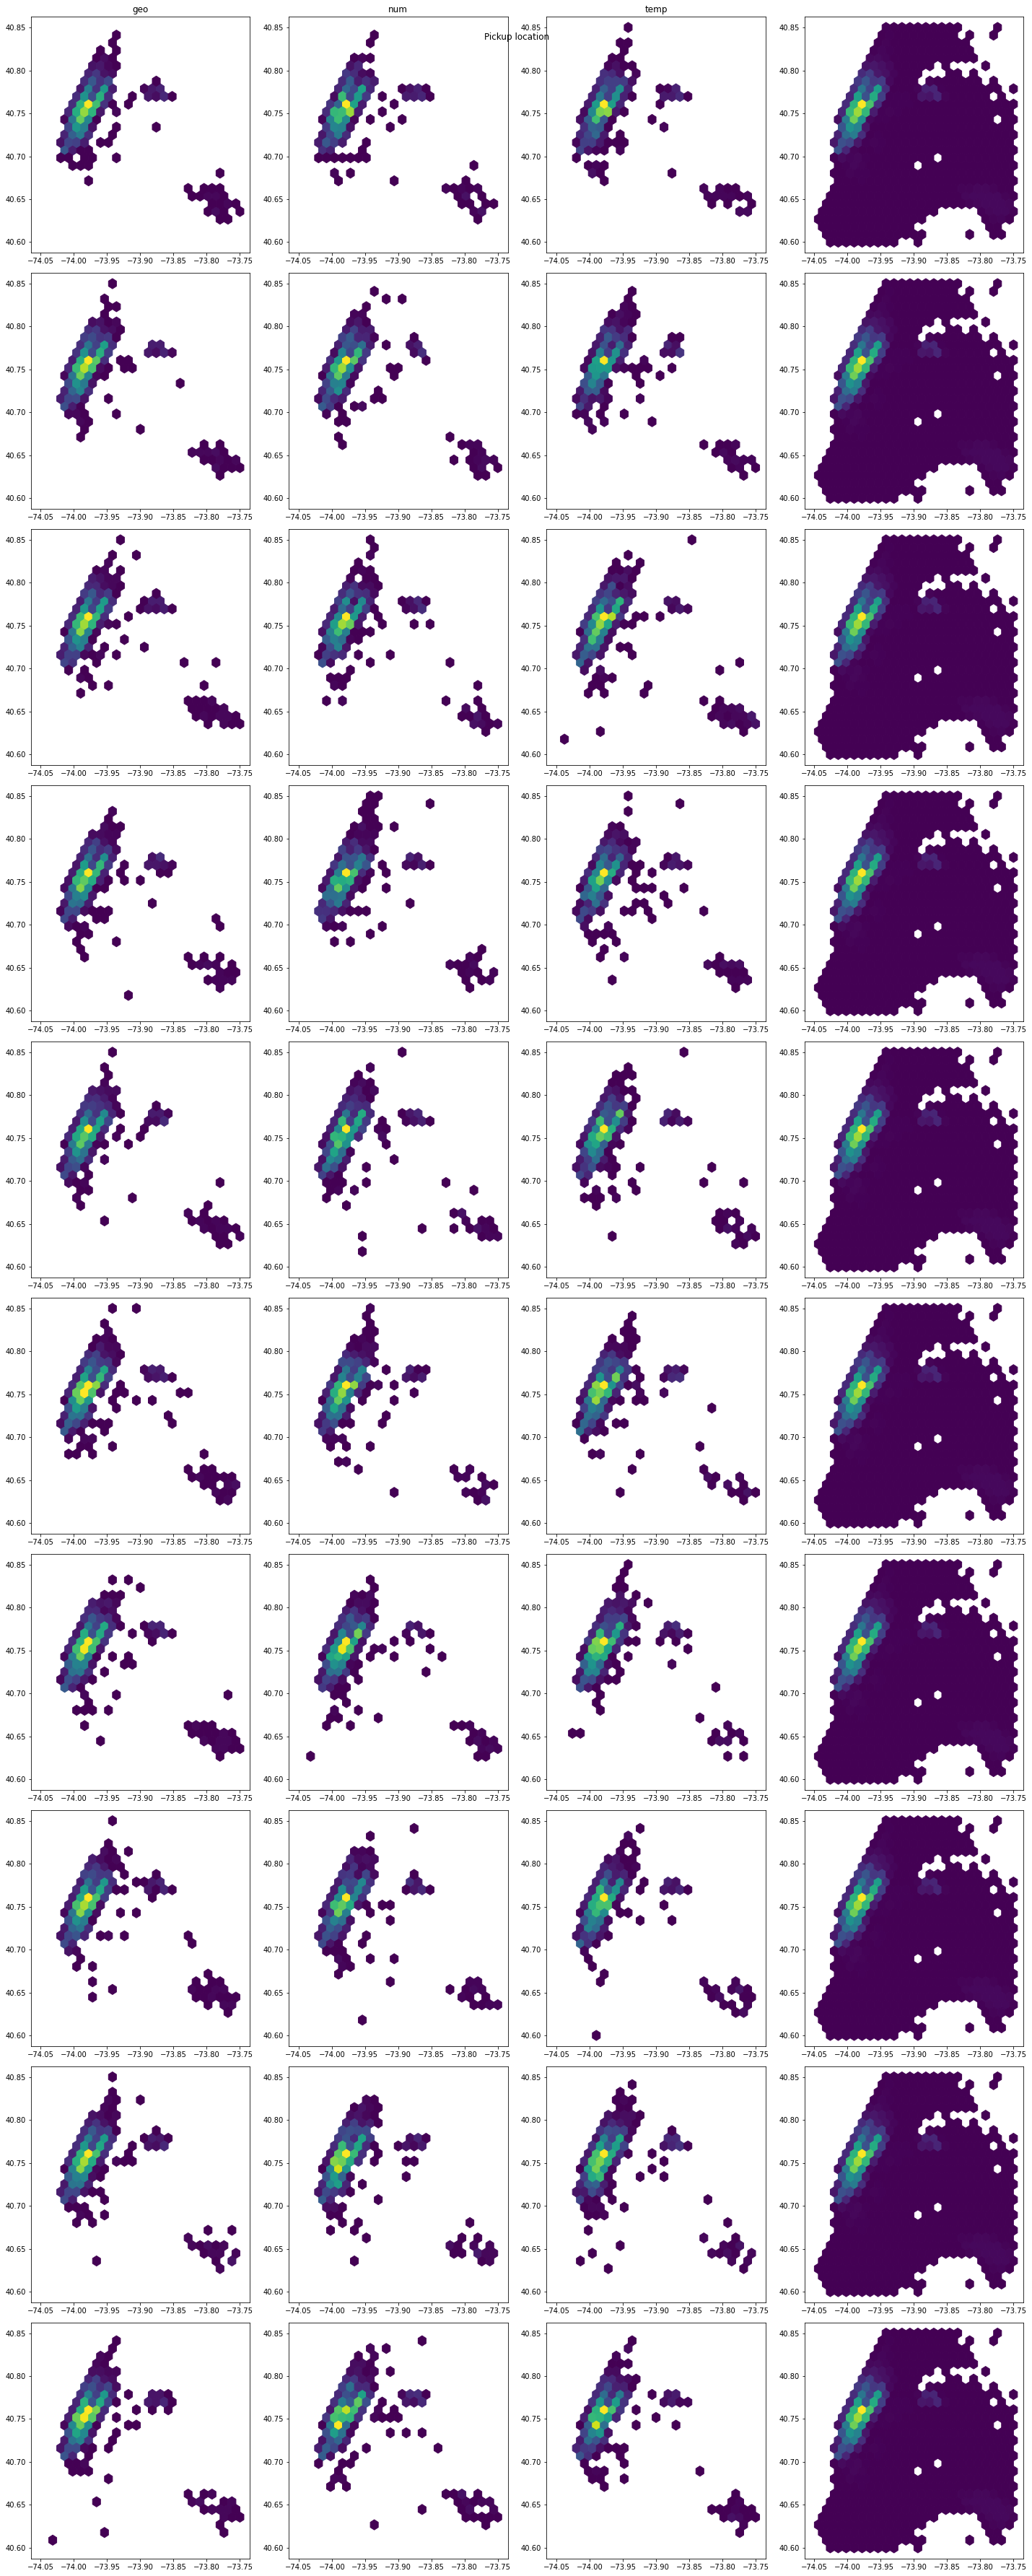

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def geo_hexbin(sample_df: pd.DataFrame, ax: plt):
  return ax.hexbin(
    x=sample_df["PURepresentativeX"], 
    y=sample_df["PURepresentativeY"],
    # bins="log",
    mincnt=1,
    gridsize=25,
    extent=[-74.05, -73.75, 40.6, 40.85]
  )


columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]


def plot_geo():
  fig, ax = plt.subplots(n_chunks, 4, figsize=(20, n_chunks * 5))
  fig.suptitle("Pickup location")

  ground_truth_df = pd.DataFrame(pl1.subdivision.linearization, columns=columns)

  for i in range(n_chunks):
    chunk_geo = pd.DataFrame(pl1.get_next_chunk(), columns=columns)
    chunk_num = pd.DataFrame(pl2.get_next_chunk(), columns=columns)
    chunk_temp = pd.DataFrame(pl3.get_next_chunk(), columns=columns)

    geo_hexbin(chunk_geo, ax[i][0])
    geo_hexbin(chunk_num, ax[i][1])
    geo_hexbin(chunk_temp, ax[i][2])
    geo_hexbin(ground_truth_df, ax[i][3])

  for ax_, col in zip(ax[0], ["geo", "num", "temp"]):
    ax_.set_title(col)
  
  plt.tight_layout()
  plt.show()

n_chunks = 10
plot_geo()

A conclusion from this test is that by linearizing along the geospatial attribute, we can ensure a relatively consistent distribution across consecutive chunks. 
Comparing `geo` to the other two classes, we can see that in particular the regions around the two airports La Guardia and JFK, the points in the sparse areas, and the outliers around Manhattan are more consistent.
We get this spatial consistency from the z-order curve.

### Effect of exchanging the subdivision strategy

Below, we demonstrate how exchanging the subdivision strategy allows us to influence the distribution of values in the early chunking:

The pipelines:

In [2]:
import os, sys
sys.path.append(f"{os.getcwd()}/../")

from pipeline.Pipeline import Pipeline

# focus on spatial attributes
config1 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [5]  # travel_distance
  }
}

# focus on numerical attributes
config2 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "stratified",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [5]  # travel_distance
  }
}

# focus on temporal attribute
config3 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "representative",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [5],  # travel_distance,
    "k": 1000
  }
}

pl1 = Pipeline(config1)
pl2 = Pipeline(config2)
pl3 = Pipeline(config3)

preprocessing pipeline ...
Done with the pre-processing


### Test for the 1d distance subdivision:

In [83]:
import numpy as np

X = np.random.randint(low=0, high=20, size=10)
X_ = np.array(X)
n_bins = 5

X_[:-1] = X[1:]
X_[-1] = X[0]

X_jump = np.abs(X - X_)

biggest_jump_indeces = np.argsort(X_jump)[-n_bins:]  # one larger than n_bins
biggest_jump_indeces = biggest_jump_indeces[np.argsort(biggest_jump_indeces)]

subdivision = {}
for i in range(n_bins):
    if i == 0:
      first = 0
      last = biggest_jump_indeces[i]
      subdivision[i] = X[first:last + 1]
    elif i == n_bins - 1:
      first = biggest_jump_indeces[i - 1]
      last = -1
      subdivision[i] = X[first+1:]
    else:
      first = biggest_jump_indeces[i - 1]
      last = biggest_jump_indeces[i]
      subdivision[i] = X[first+1:last+1]
    print(first, last)

subdivision, X, biggest_jump_indeces

0 3
3 5
5 6
6 8
8 -1


({0: array([6, 7, 5, 8]),
  1: array([14, 10]),
  2: array([5]),
  3: array([11,  8]),
  4: array([14])},
 array([ 6,  7,  5,  8, 14, 10,  5, 11,  8, 14]),
 array([3, 5, 6, 8, 9], dtype=int64))

distribution per chunk


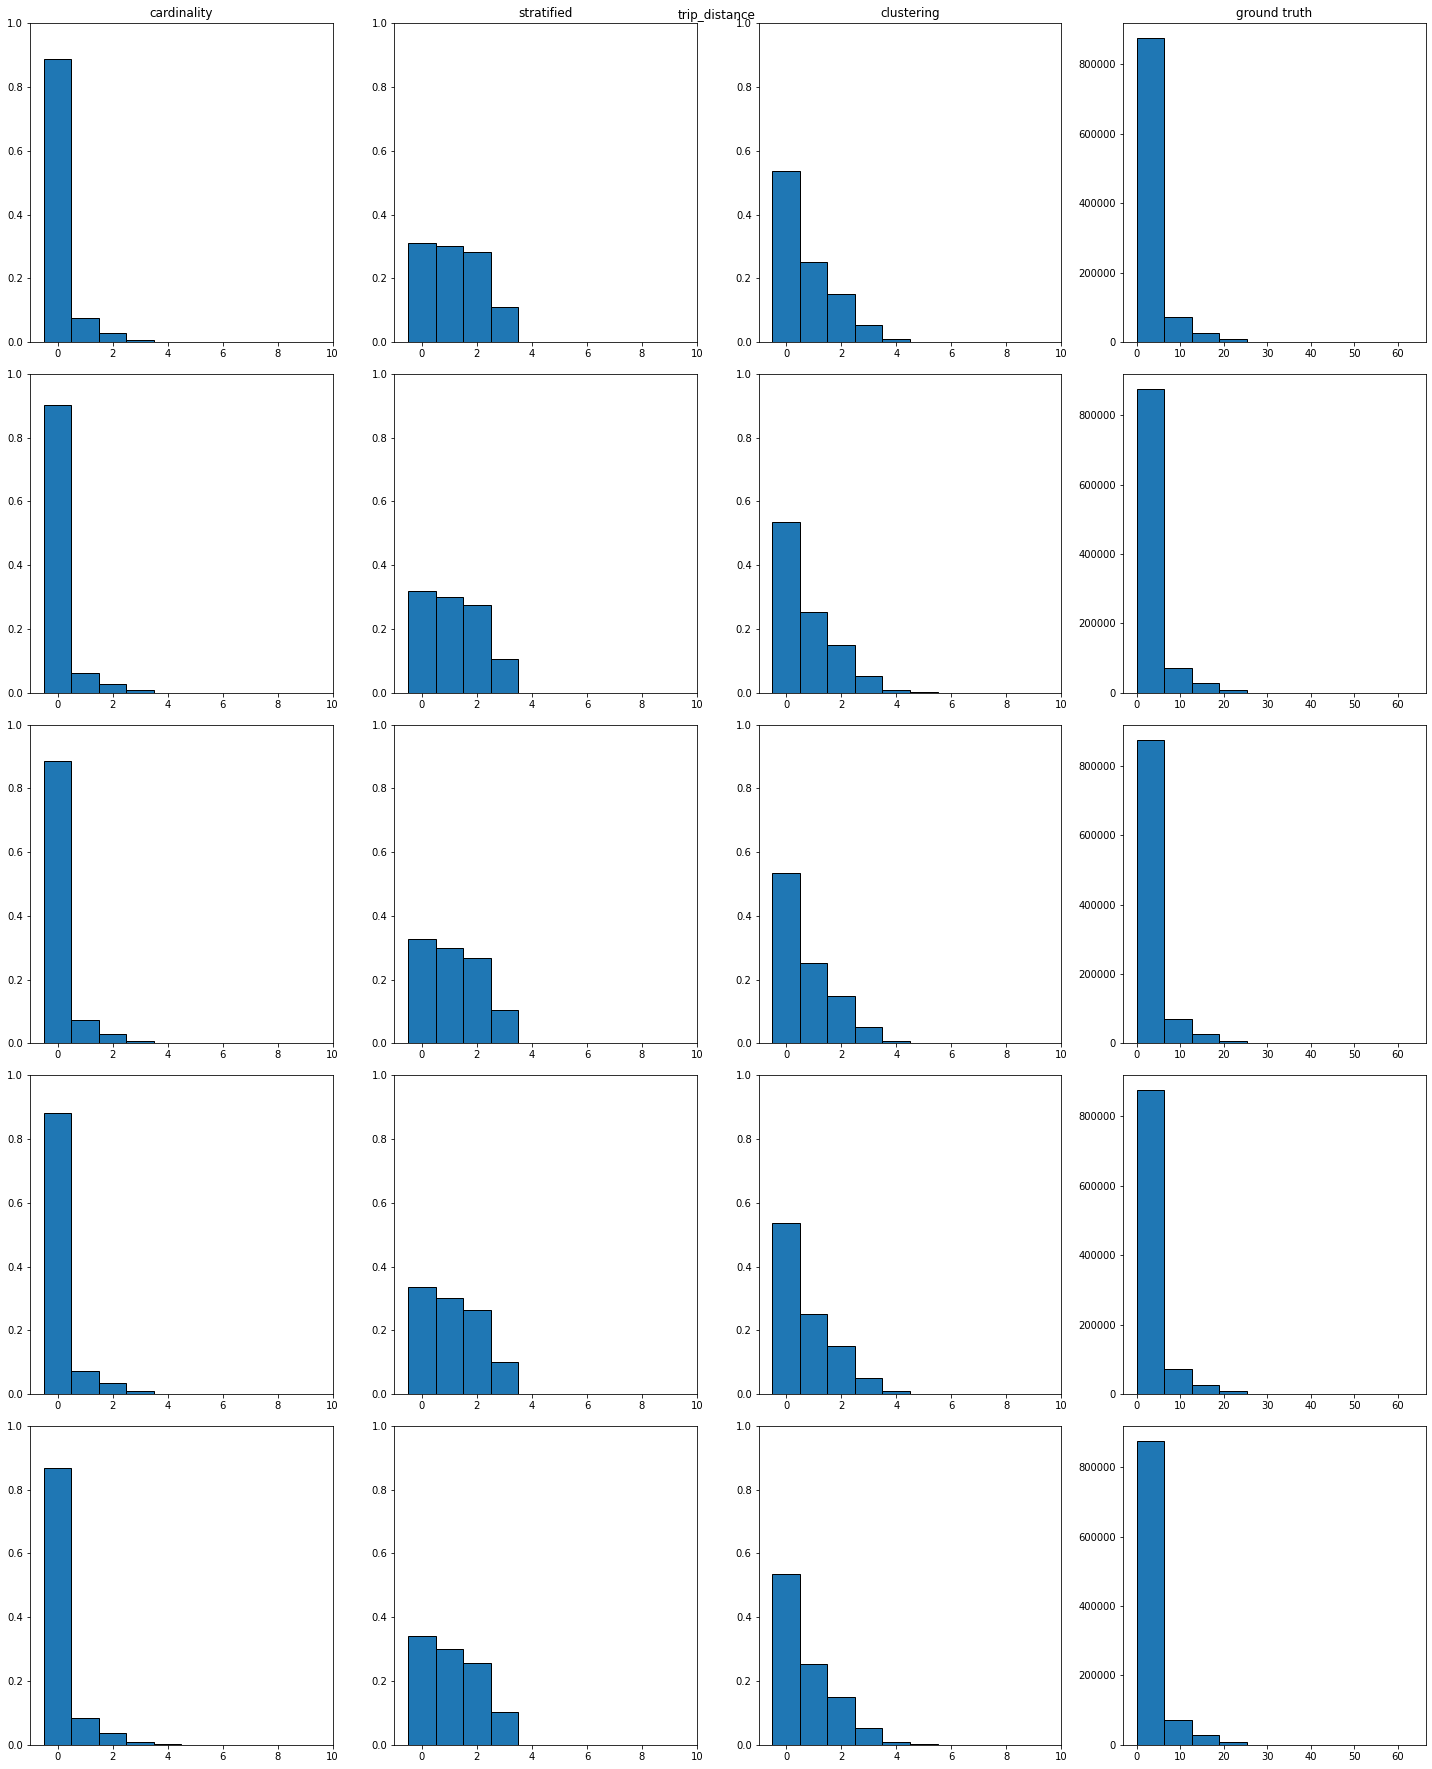

size per bin


<BarContainer object of 985 artists>

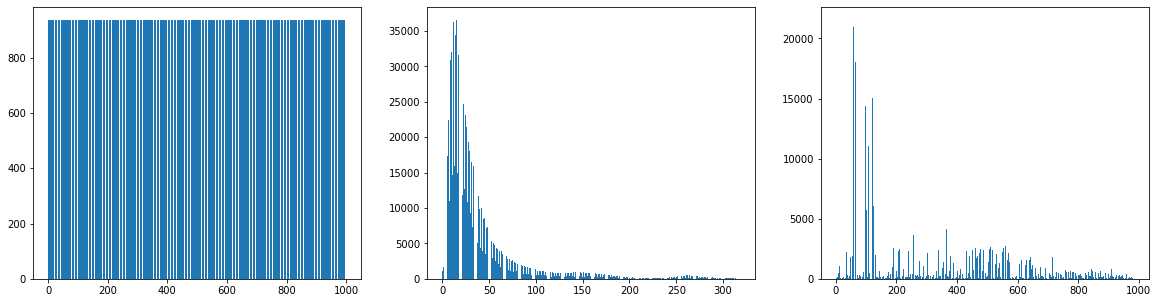

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def scatter(df: pd.DataFrame, range: list[int], ax: plt):
  return ax.scatter(
    x=df[df.columns[0]],
    y=df[df.columns[1]],
  )

def hist(sample_df: pd.Series, value_range: tuple, n_bins, ax: plt):
  return ax.hist(
    sample_df, 
    bins=n_bins,
    range=value_range,
    edgecolor='black', 
    linewidth=1
  )

def delta_hist(delta: pd.Series, ax: plt):
  return ax.bar(
    delta.index,
    delta,
    width=1,
    edgecolor='black', 
    linewidth=1,
  )


columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]


def plot_hist(attr: str):
  fig, ax = plt.subplots(n_chunks, 4, figsize=(20, n_chunks * 5))
  fig.suptitle(attr)

  n_bins = 10
  ground_truth_df = pd.DataFrame(pl1.subdivision.linearization, columns=columns)[attr]
  bins = np.linspace(ground_truth_df.min(), ground_truth_df.max(), n_bins+1)  # because arange does not include max

  value_range = [ground_truth_df.min(), ground_truth_df.max()]

  for i in range(n_chunks):
    chunk_cardinality = pd.DataFrame(pl1.get_next_chunk(), columns=columns)[attr]
    chunk_stratified = pd.DataFrame(pl2.get_next_chunk(), columns=columns)[attr]
    chunk_clustering = pd.DataFrame(pl3.get_next_chunk(), columns=columns)[attr]

    for j, df in enumerate([chunk_cardinality, chunk_stratified, chunk_clustering]):
      df_bins = np.histogram(df, bins=bins)[0]
      df_bins = df_bins / df_bins.sum()
      delta_hist(pd.Series(df_bins), ax[i][j])
      ax[i][j].set_ylim(0, 1)
    

    hist(ground_truth_df, value_range, n_bins, ax[i][3])

  for ax_, col in zip(ax[0], ["cardinality", "stratified", "clustering", "ground truth"]):
    ax_.set_title(col)
  
  plt.tight_layout()
  plt.show()

n_chunks = 5
print("distribution per chunk")
plot_hist("trip_distance")


print("size per bin")
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].bar(
  x=np.arange(0, len(list(pl1.selection.subdivision.keys()))), 
  height=np.array([len(pl1.selection.subdivision[s]) for s in pl1.selection.subdivision])
)
ax[1].bar(
  x=np.arange(0, len(list(pl2.selection.subdivision.keys()))), 
  height=np.array([len(pl2.selection.subdivision[s]) for s in pl2.selection.subdivision])
)
ax[2].bar(
  x=np.arange(0, len(list(pl3.selection.subdivision.keys()))), 
  height=np.array([len(pl3.selection.subdivision[s]) for s in pl3.selection.subdivision])
)


### Effect of exchanging the selection strategy on chunk distributions

Below, we demonstrate the impact of the selection strategy on the retrieved values, comparing four pipelines which vary only in the selection strategy they use.

The pipelines:

In [1]:
import os, sys
sys.path.append(f"{os.getcwd()}/../")

from pipeline.Pipeline import Pipeline

# focus on spatial attributes
config1 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cardinality",
  "selection": "minimum",
  "dimension": 5,
  "params": {
    "subspace": [5]  # travel_distance
  }
}

# focus on numerical attributes
config2 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cardinality",
  "selection": "median",
  "dimension": 5,
  "params": {
    "subspace": [5]  # travel_distance
  }
}

# focus on temporal attribute
config3 = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cardinality",
  "selection": "maximum",
  "dimension": 5,
  "params": {
    "subspace": [5]  # travel_distance
  }
}

pl1 = Pipeline(config1)
pl2 = Pipeline(config2)
pl3 = Pipeline(config3)

preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing


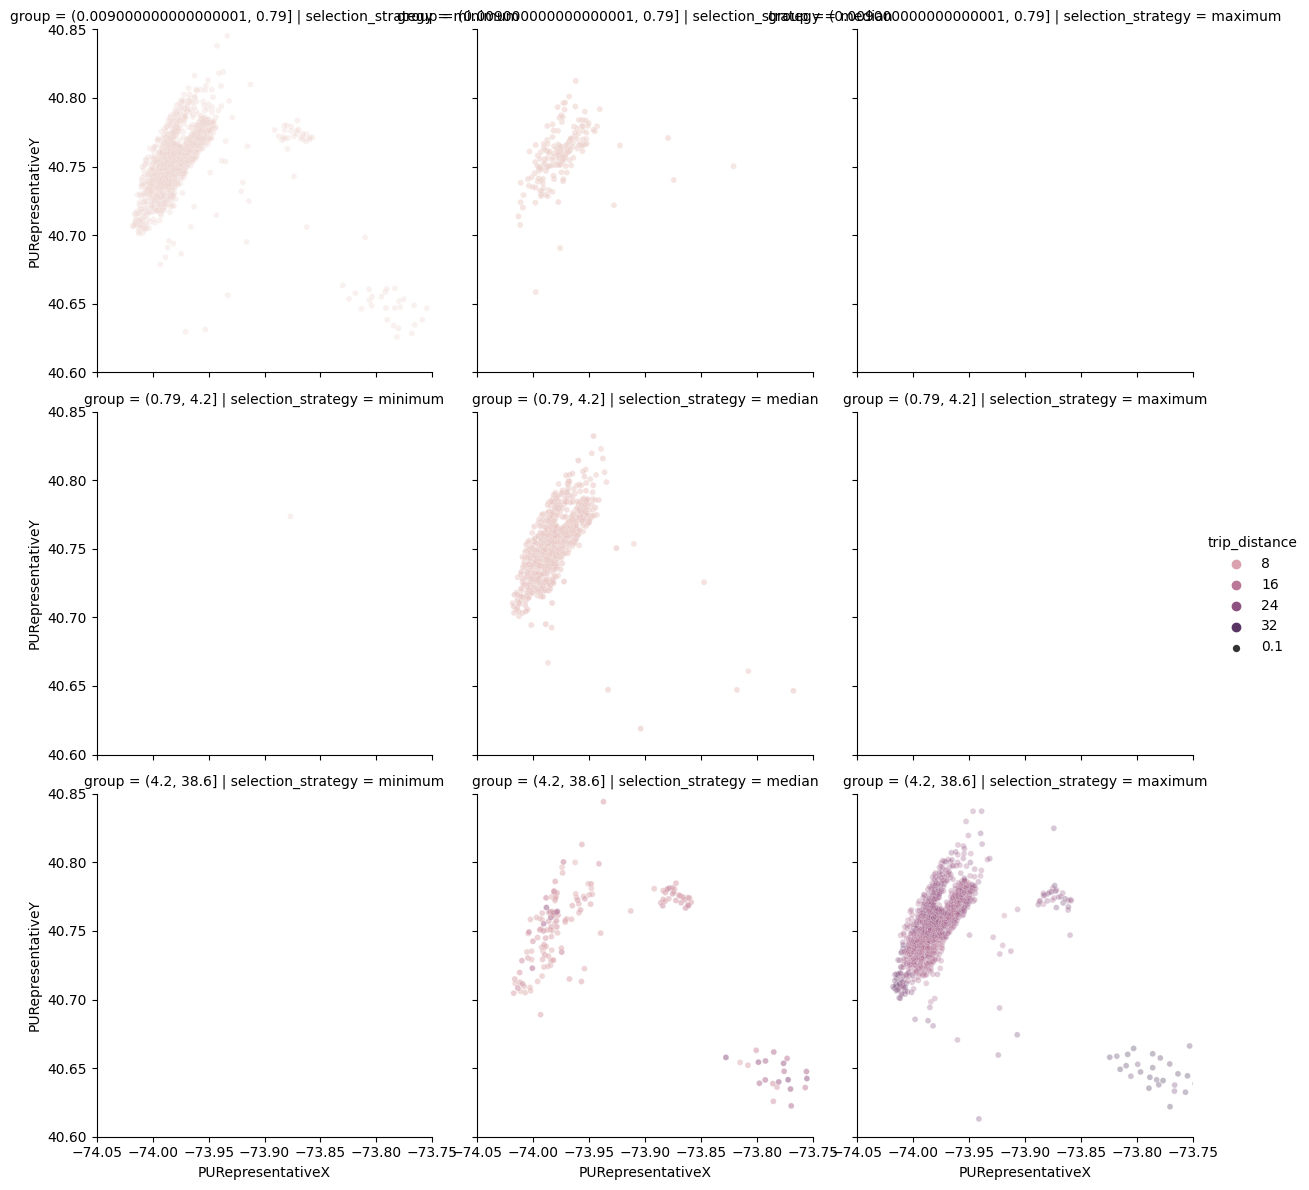

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def geo_scatter(sample_df: pd.DataFrame):
  # divide the trip_distance dimension into buckets
  sample_df["group"] = pd.qcut(sample_df["trip_distance"].astype(np.float64), 3)

  return sns.relplot(
    data=sample_df,
    x="PURepresentativeX",
    y="PURepresentativeY",
    col="selection_strategy",
    row="group",
    hue="trip_distance",
    kind="scatter",
    size=0.1,
    height=4,
    alpha=0.3
  )


columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]


def plot_geo_scatter(n_chunks: int):
  for i in range(n_chunks):
    chunk_minimum = pd.DataFrame(pl1.get_next_chunk(), columns=columns)
    chunk_minimum["selection_strategy"] = "minimum"
    chunk_median = pd.DataFrame(pl2.get_next_chunk(), columns=columns)
    chunk_median["selection_strategy"] = "median"
    chunk_maximum = pd.DataFrame(pl3.get_next_chunk(), columns=columns)
    chunk_maximum["selection_strategy"] = "maximum"

    ax = geo_scatter(pd.concat([chunk_minimum, chunk_median, chunk_median, chunk_maximum]))
    ax.set(xlim=(-74.05, -73.75))
    ax.set(ylim=(40.6, 40.85))


plot_geo_scatter(n_chunks=1)

In [16]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.rand(100, 2), columns=["A", "B"])

bins = pd.qcut(df["A"], 4, labels=["one", "two", "three", "four"])
bins

0       one
1       one
2     three
3       two
4       two
      ...  
95     four
96      one
97      two
98      one
99     four
Name: A, Length: 100, dtype: category
Categories (4, object): ['one' < 'two' < 'three' < 'four']

### Effect of exchanging the subdivision strategy on chunk distributions
Below, we demonstrate that we can exchange the subdivision strategy without reloading the entire pipeline, indicative by the shift in the distribution of values that we retrieve.

preprocessing pipeline ...
Done with the pre-processing
updating the subdivision
Done updating the subdivision


<AxesSubplot:xlabel='trip_distance', ylabel='Count'>

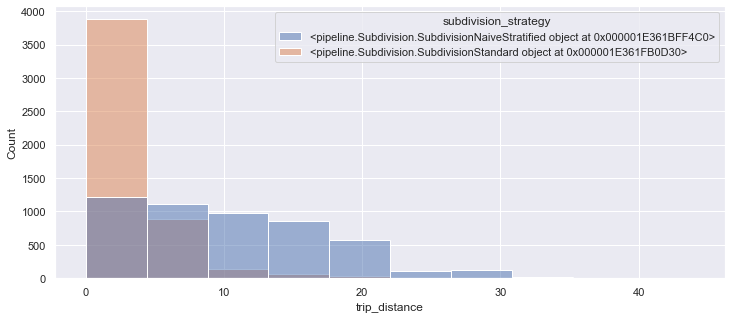

In [5]:
import os, sys
sys.path.append(f"{os.getcwd()}/../")

import pandas as pd
import numpy as np
import seaborn as sns
from pipeline.Pipeline import Pipeline


config = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "stratified",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [5]  # travel_distance
  }
}

columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]

def comparison_hist(sample_df: pd.DataFrame):
  sns.set(rc={'figure.figsize':(12,5)})
  return sns.histplot(
    data=sample_df,
    x="trip_distance",
    hue="subdivision_strategy",
    bins=10
  )

pl = Pipeline(config)

n_chunks = 5

# draw a few samples
df_1 = pd.concat(
  [
    pd.DataFrame(pl.get_next_chunk(1000), columns=columns) for _ in range(n_chunks)
  ], 
  ignore_index=True
)
df_1["subdivision_strategy"] = pl.subdivision

# update the subdivision strategy without reloading the entire pipeline (which means that we can 
# just continue the analysis, without sampling the same data again)
pl.update_subdivision("cardinality")

# draw a few chunks again
df_2 = pd.concat(
  [
    pd.DataFrame(pl.get_next_chunk(1000), columns=columns) for _ in range(n_chunks)
  ], 
  ignore_index=True
)
df_2["subdivision_strategy"] = pl.subdivision


comparison_hist(pd.concat([df_1, df_2], ignore_index=True))


### Modularity: How changing the pipeline affects the output

In [ ]:
import os, sys
sys.path.append(f"{os.getcwd()}/../")

import pandas as pd
import numpy as np
import seaborn as sns
from pipeline.Pipeline import Pipeline


columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]

base_config = {
  "data": "taxis",
  "linearization": "random",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [17, 18],  # pickup location
  }
}

linearizations = ["random", "z-order", "numeric"]
subdivisions = ["cardinality", "cohesion"]
selections = ["minimum", "median", "maximum"]

df = pd.DataFrame()

for linearization in linearizations:
  config = base_config.copy()
  config["linearization"] = linearization
  # run z-order on geospatial attributes, run numeric-sort on numerical data
  if linearization == "numeric":
    config["params"]["subspace"] = [5]
  pl = Pipeline(config)
  for subdivision in subdivisions:
    # config["subdivision"] = subdivision
    pl.update_subdivision(subdivision)
    for selection in selections:
      # config["selection"] = selection
      pl.update_selection(selection)

      chunk = pd.DataFrame(pl.get_next_chunk(10000), columns=columns)
      chunk["linearization"] = linearization
      chunk["subdivision"] = subdivision
      chunk["selection"] = selection
      df = pd.concat([df, chunk], ignore_index=True)


In [6]:
df.to_csv("full_run2.csv", index=False)

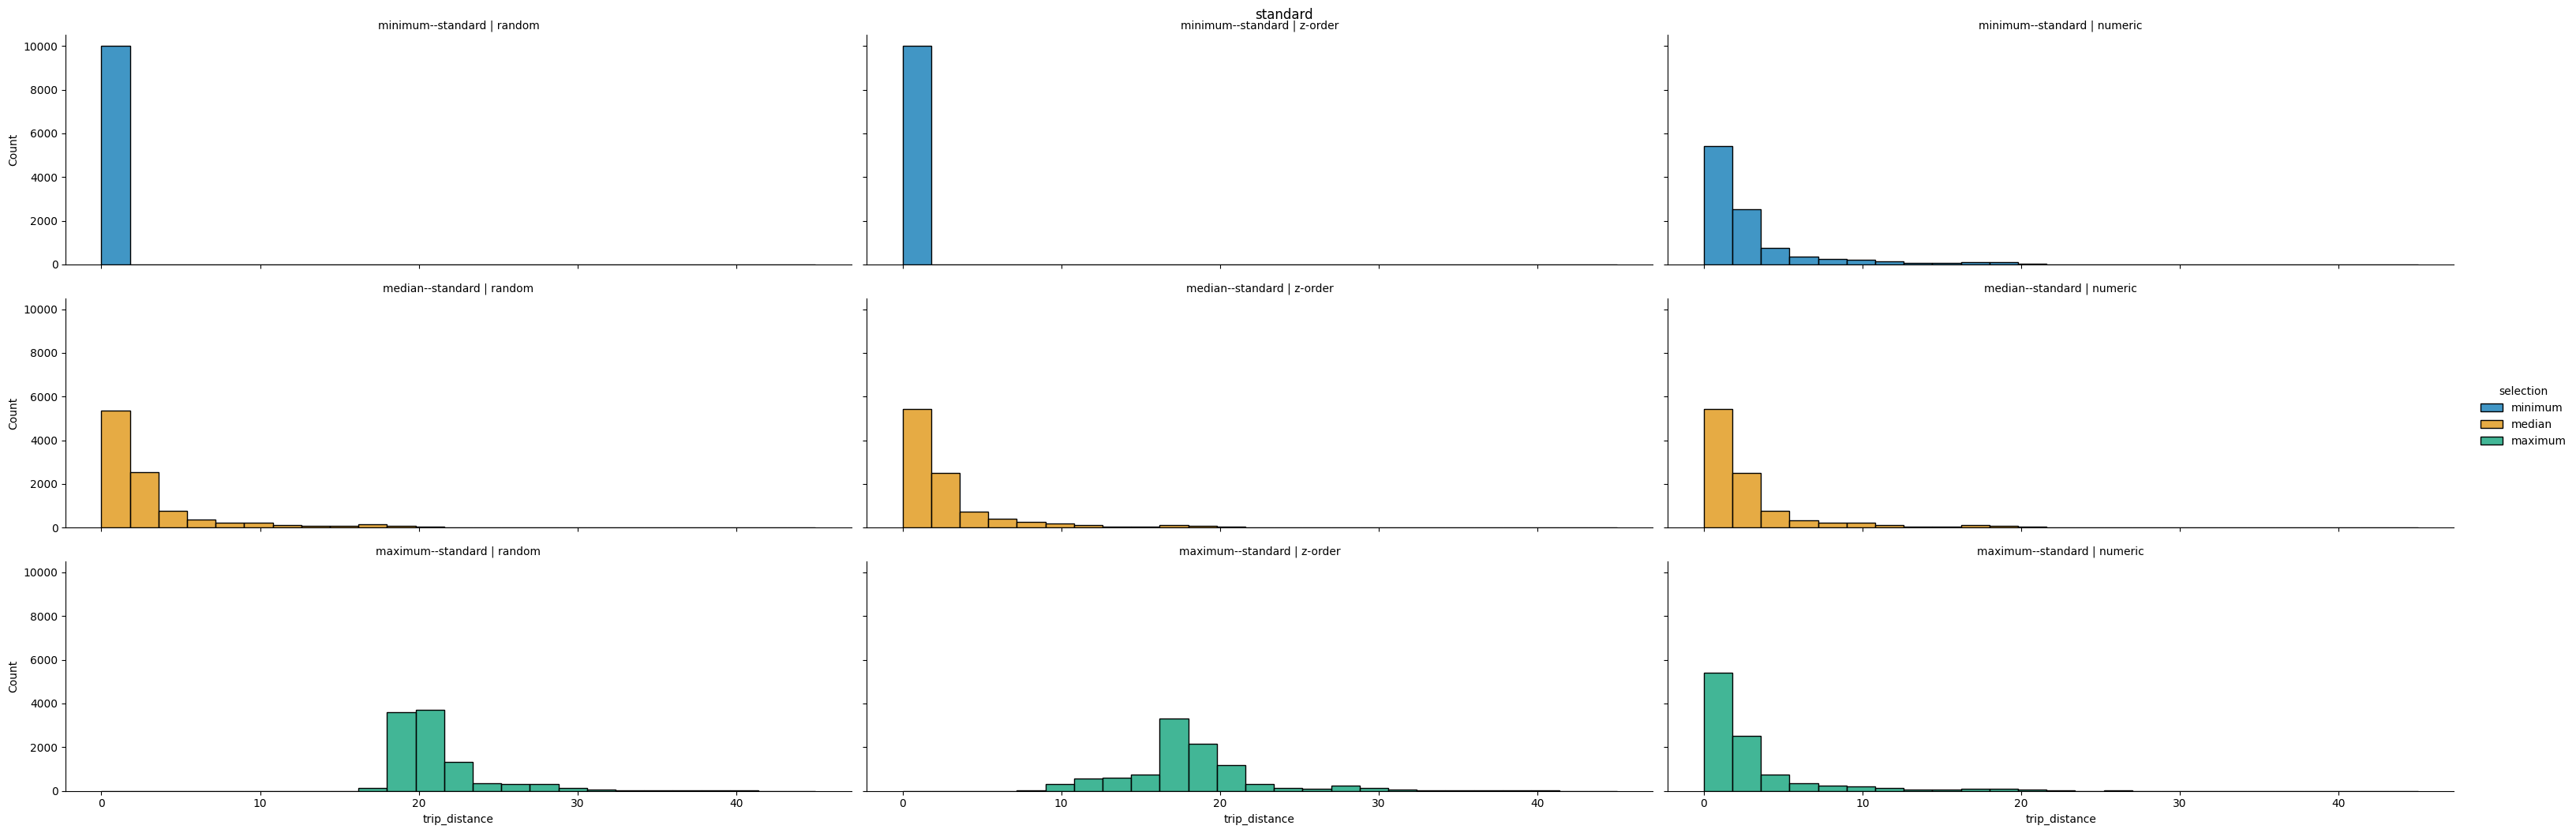

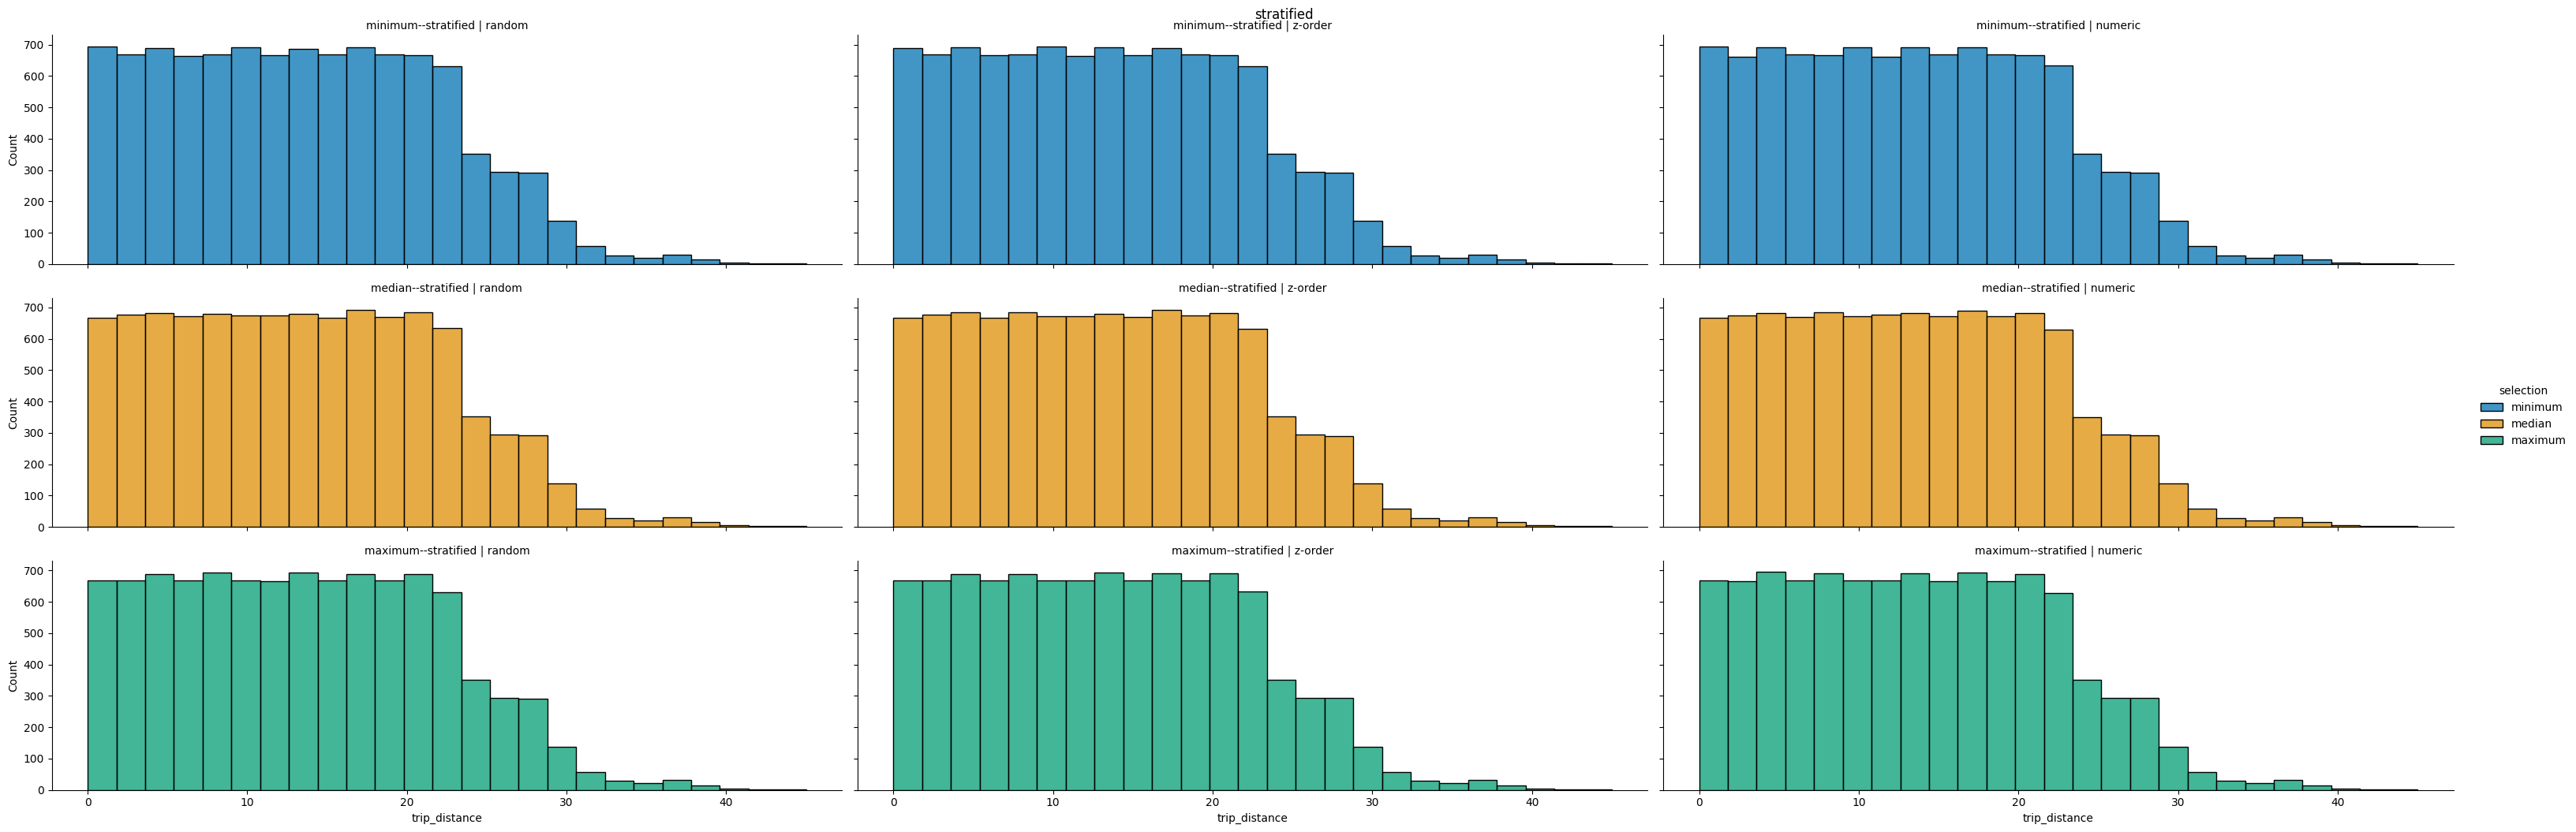

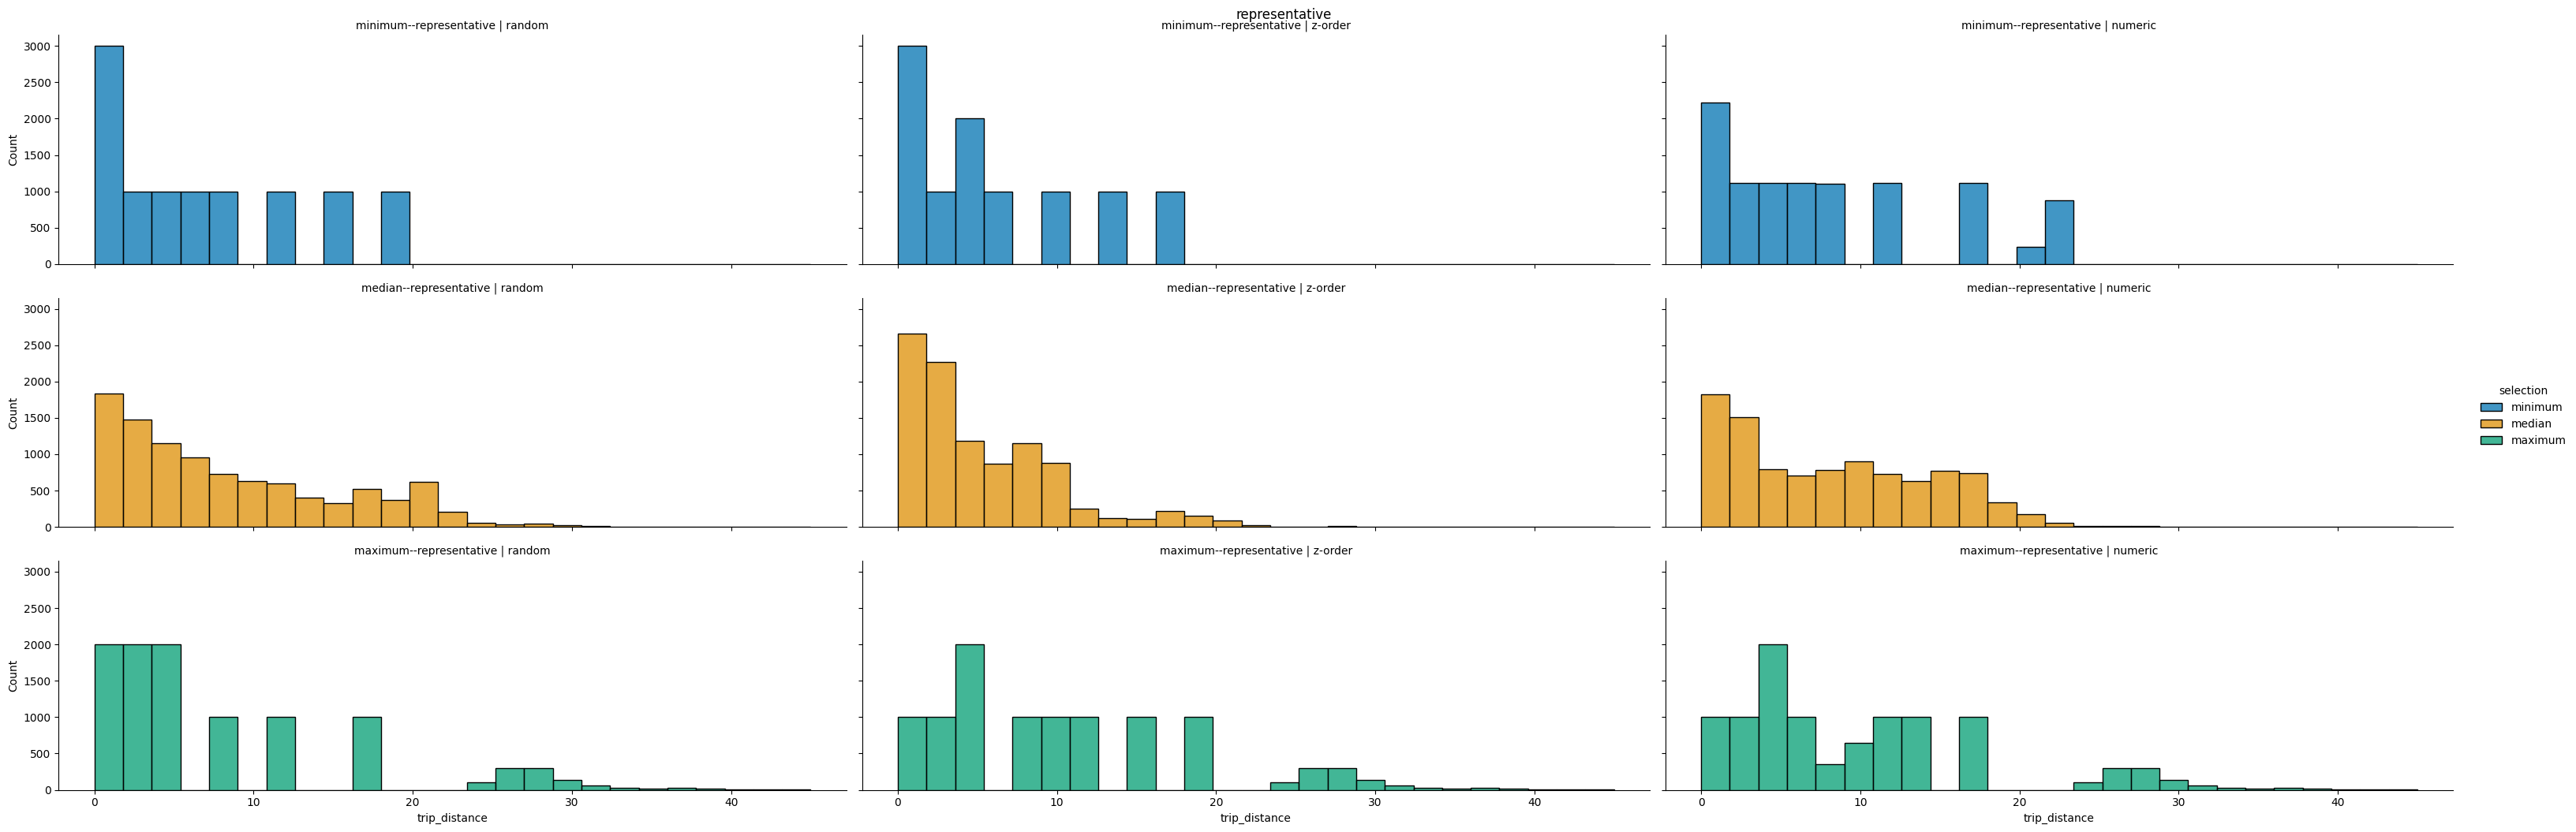

In [ ]:
df["sel-sub"] = df["selection"] + "--" + df["subdivision"]
for subdivision in df["subdivision"].unique():
  df_ = df[df["subdivision"] == subdivision]
  g = sns.FacetGrid(
    data=df_,
    col="linearization",
    row="sel-sub",
    hue="selection",
    palette="colorblind",
    height=3.5,
    aspect=3,
  )
  g.map(
    sns.histplot, 
    "trip_distance", 
    bins=25, 
    binrange=[0, 45],
    # log_scale=True,
    legend=True,
  )
  # g.set(ylim=(0, 600))
  g.set_titles(col_template="{col_name}", row_template="{row_name}")
  g.fig.suptitle(subdivision, y=1)
  g.add_legend()

### Demonstrating modularity

Rendering functions used in the following examples:

In [81]:
import sys, os
sys.path.append(f"{os.getcwd()}/../")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pipeline.Pipeline import Pipeline

columns = ["tripID", "VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "passenger_count", "trip_distance", "RatecodeID", "PULocationID", "DOLocationID", "payment_type", "fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "PURepresentativeX", "PURepresentativeY", "DORepresentativeX", "DORepresentativeY", "normalized_value", "normalized_spatial_lag", "value_is_H", "spatial_lag_is_H"]

# precompute ground truth bins
gt_df = pd.read_csv("./linearization_files/taxisLinearizationRandom.csv", sep=";", names=columns)
gt_df = gt_df["trip_distance"]
min_dist = gt_df.min()
max_dist = gt_df.max()
n_bins = 100
bins = np.linspace(gt_df.min(), gt_df.max(), n_bins+1)  # because arange does not include max
gt_bins = np.histogram(gt_df, bins=bins)[0]
gt_bins = gt_bins / gt_bins.sum()

def plot_delta_hist(df: pd.DataFrame, facet: str):
  cases = df[facet].unique()
  # make sure there are at least two plots so that the ax[i] works
  fig, ax = plt.subplots(nrows=1, ncols=max(cases.size, 2), figsize=(len(cases) * 10, 2.5))
  
  for i, case in enumerate(cases):
    # compute the relative difference in value distributions from the "ground truth"
    df_ = df[df[facet] == case]
    df_bins = np.histogram(df_["trip_distance"], bins=bins)[0]
    df_bins = df_bins / df_bins.sum()

    delta = df_bins - gt_bins
    color = ["#1b9e77" if value > 0 else "#7570b3" for value in delta]

    ax[i].bar(
      np.arange(0, len(delta)),
      height=delta,
      color=color,
      width=1,
      edgecolor='black', 
      linewidth=1,
    )
    ax[i].set_ylim(-0.5, 0.5)
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False) if i > 0 else None

  plt.tight_layout()
  fig.show()


def plot_hist(df: pd.DataFrame, facet: str):
  g = sns.FacetGrid(
    data=df,
    col=facet,
    palette="colorblind",
    height=3.5,
    aspect=1.75,
  )
  
  g.map(
    sns.histplot, 
    "trip_distance", 
    bins=n_bins, 
    binrange=[min_dist, max_dist],
    # log_scale=True,
    legend=True,
  )

  # g.set(ylim=(0, 600))
  g.set_titles(col_template="{col_name}", row_template=f"{facet}" + ": {row_name}")
  g.fig.suptitle(facet, y=1)
  g.add_legend()


def plot_geo(df: pd.DataFrame, facet: str):
  df["group"] = pd.qcut(df["trip_distance"].astype(np.float64), 3)

  g = sns.relplot(
    data=df,
    x="PURepresentativeX",
    y="PURepresentativeY",
    col=facet,
    row="group",
    kind="scatter",
    hue="trip_distance",
    # size=0.1,
    height=4,
    alpha=0.3
  )
  g.fig.suptitle(facet, y=1)
  g.add_legend()


def plot_moran(df: pd.DataFrame, facet: str):
  df["moran_label"] = df["value_is_H"].astype(str) + df["spatial_lag_is_H"].astype(str)

  g = sns.relplot(
    data=df,
    x="normalized_value",
    y="normalized_spatial_lag",
    hue="moran_label",
    row=facet,
    kind="scatter",
    # size=0.1,
    height=4,
    alpha=0.3
  )

  g.refline(x=0, y=0, color="black")

def render_chunk(df: pd.DataFrame, facet: str or list[str]):
  if type(facet) == list:
    facets = facet.copy()
    facet = "--".join(facet)
    df[facet] = ""
    for f in facets:
      df[facet] += df[f].astype(str) + " "

  plot_hist(df, facet)
  plot_delta_hist(df, facet)
  plot_geo(df, facet)
  plot_moran(df, facet)

Base configuration:

In [26]:
base_config = {
  "data": "taxis",
  "linearization": "random",
  "subdivision": "cardinality",
  "selection": "maximum",
  "dimension": 5,
  "params": {
    "subspace": [17, 18],  # pickup location,
    "value_h_index": 23,
    "lag_h_index": 24
  }
}

preprocessing pipeline ...
Done with the pre-processing
{'data': 'taxis', 'linearization': 'random', 'subdivision': 'cardinality', 'selection': 'maximum', 'dimension': 5, 'params': {'subspace': [17, 18], 'value_h_index': 23, 'lag_h_index': 24}}


C:\Users\au629923\AppData\Local\Temp\ipykernel_4244\1778694766.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


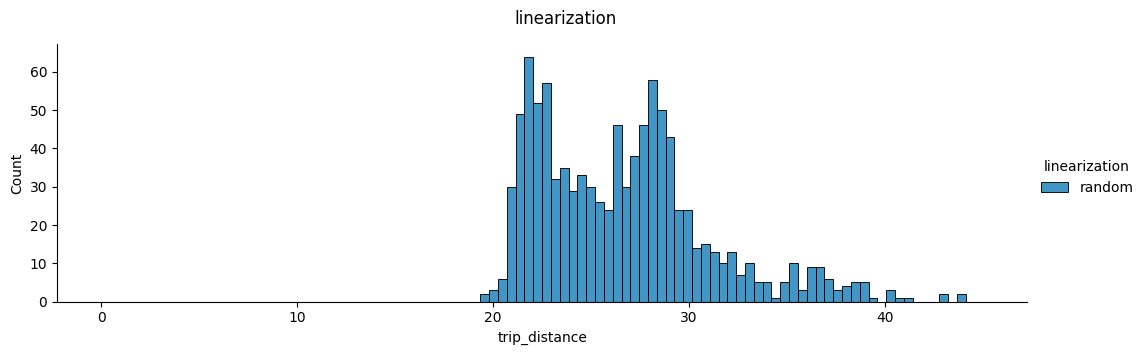

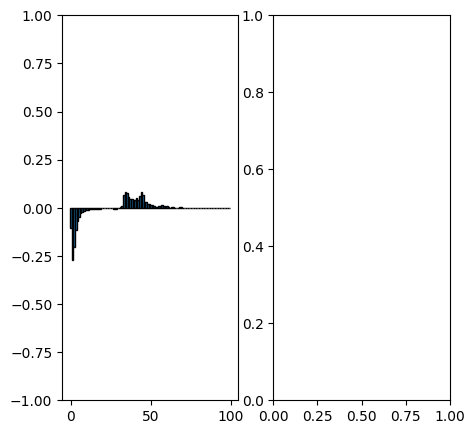

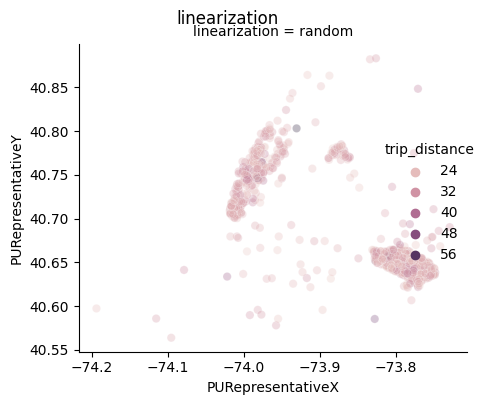

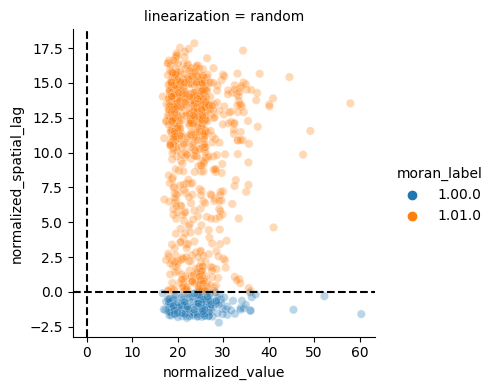

In [ ]:
pl = Pipeline(base_config)

chunk = pd.DataFrame(pl.get_next_chunk(1000), columns=columns)
chunk["linearization"] = base_config["linearization"]
chunk["subdivision"] = base_config["subdivision"]
chunk["selection"] = base_config["selection"]

print(base_config)
render_chunk(chunk, "linearization")

Changing the Linearization

preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing
preprocessing pipeline ...
Done with the pre-processing


C:\Users\au629923\AppData\Local\Temp\ipykernel_4244\785599636.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


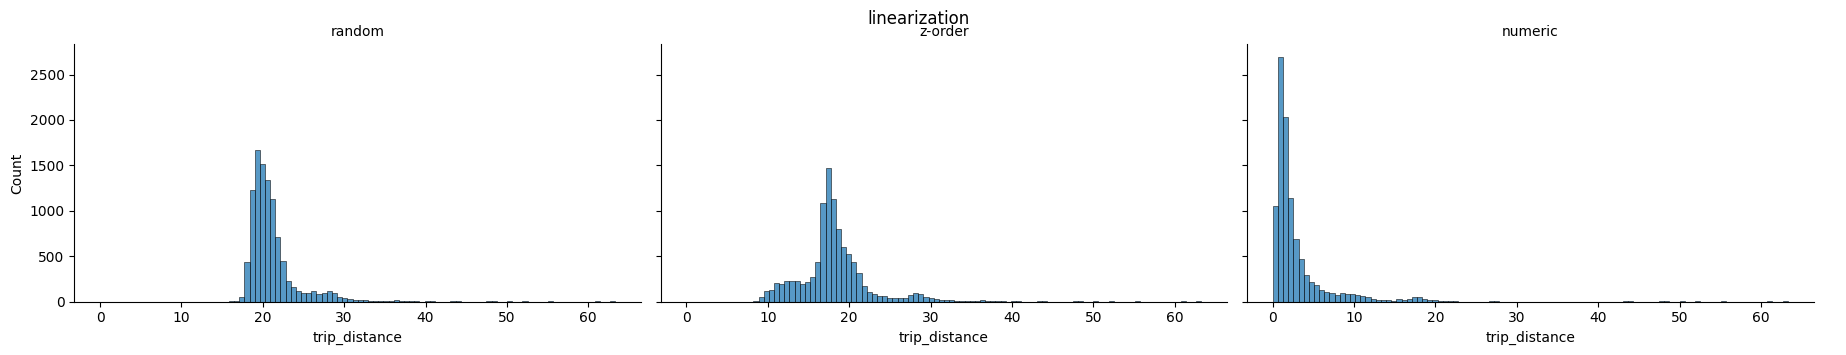

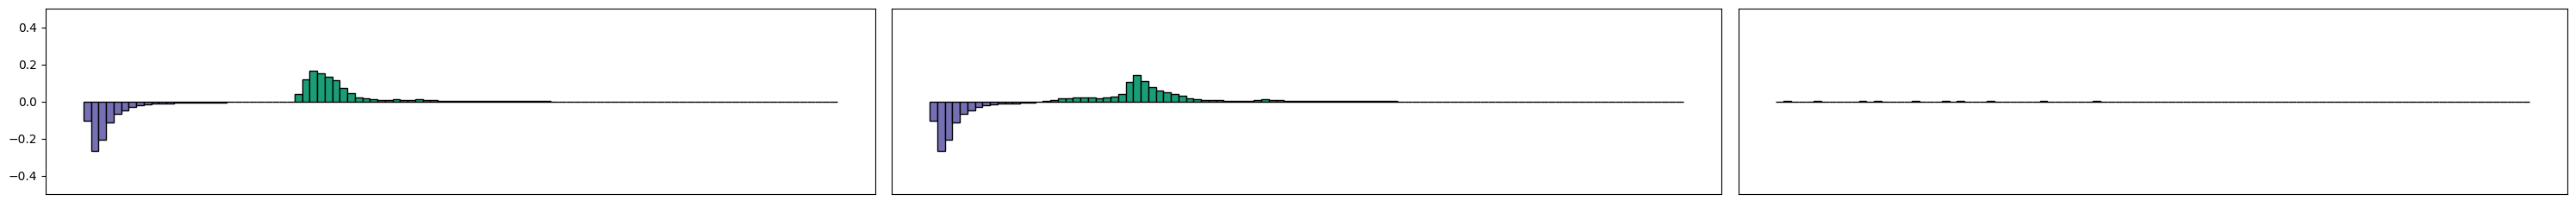

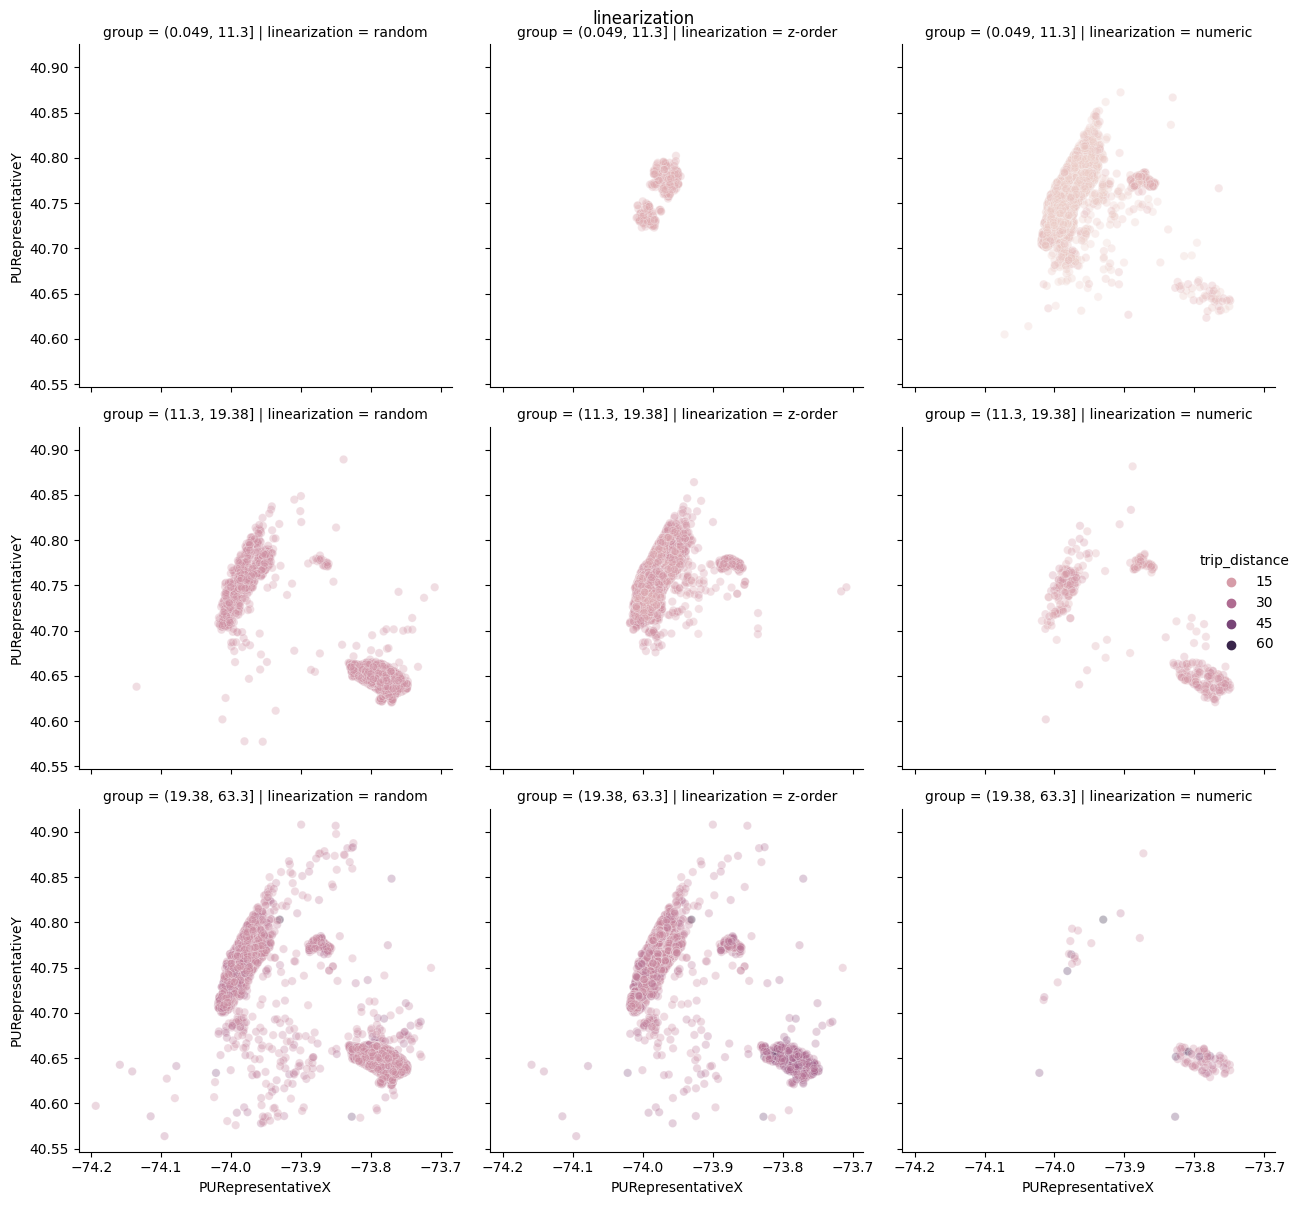

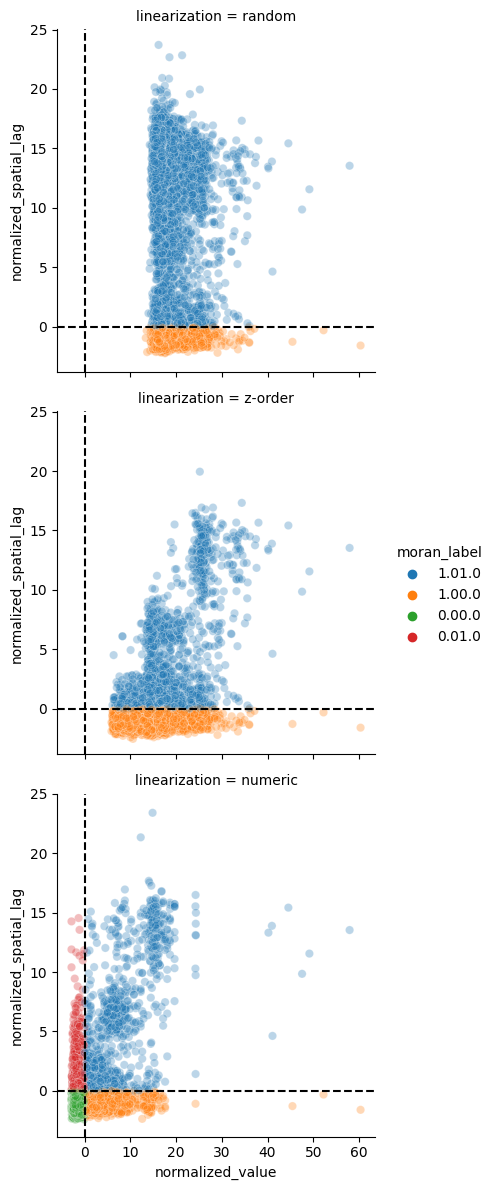

In [83]:
import pandas as pd

linearizations = ["random", "z-order", "numeric"]

df = pd.DataFrame()

for linearization in linearizations:
  config = base_config.copy()
  config["linearization"] = linearization

  pl = Pipeline(config)

  chunk = pd.DataFrame(pl.get_next_chunk(10000), columns=columns)
  chunk["linearization"] = config["linearization"]
  chunk["subdivision"] = config["subdivision"]
  chunk["selection"] = config["selection"]

  df = pd.concat([df, chunk], ignore_index=True)

render_chunk(df, "linearization")

Changing the Subdivision

preprocessing pipeline ...
Done with the pre-processing
updating the subdivision
Done updating the subdivision
updating the subdivision
Done updating the subdivision


C:\Users\au629923\AppData\Local\Temp\ipykernel_4244\785599636.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


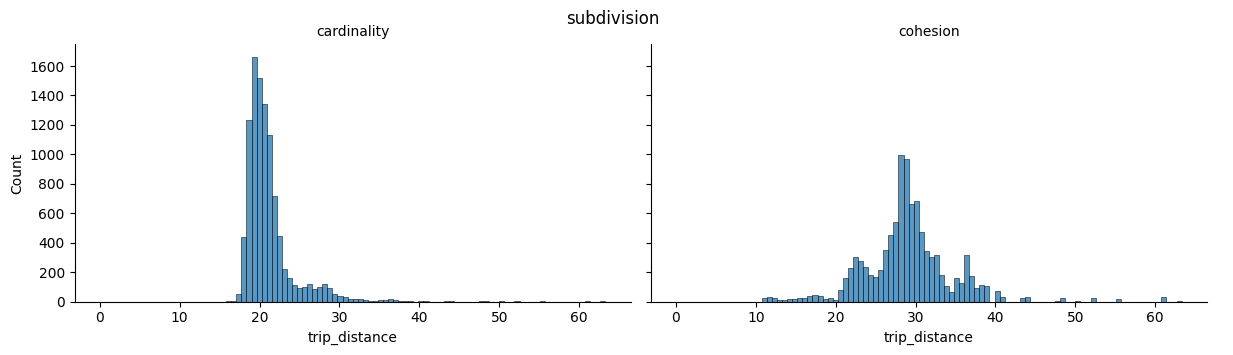

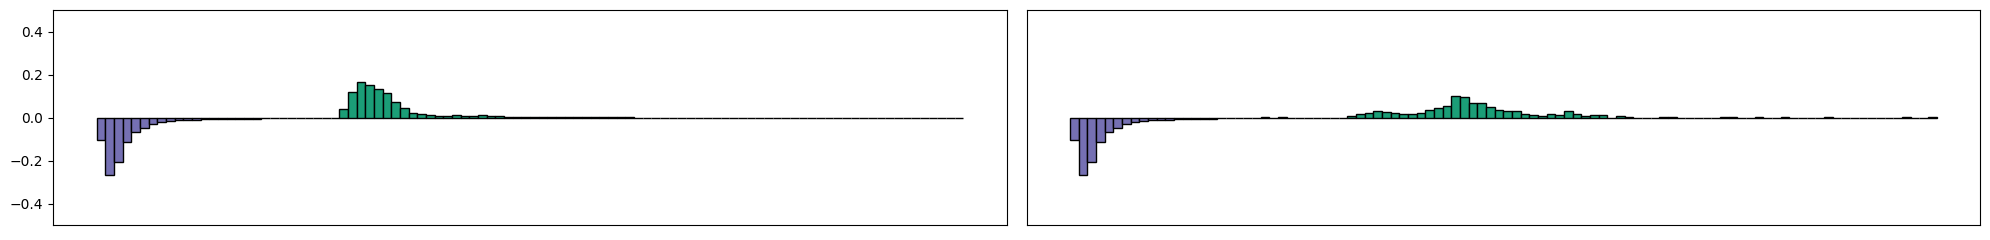

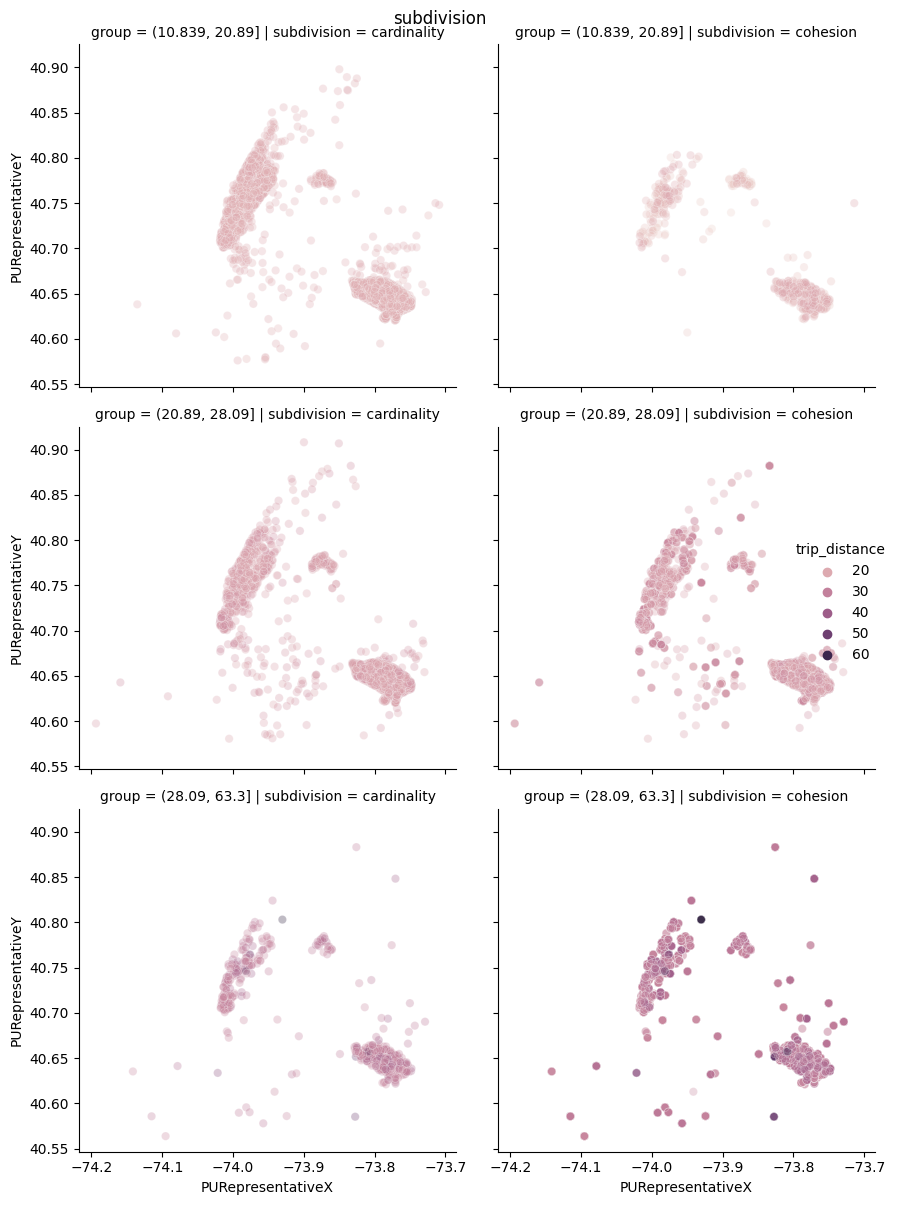

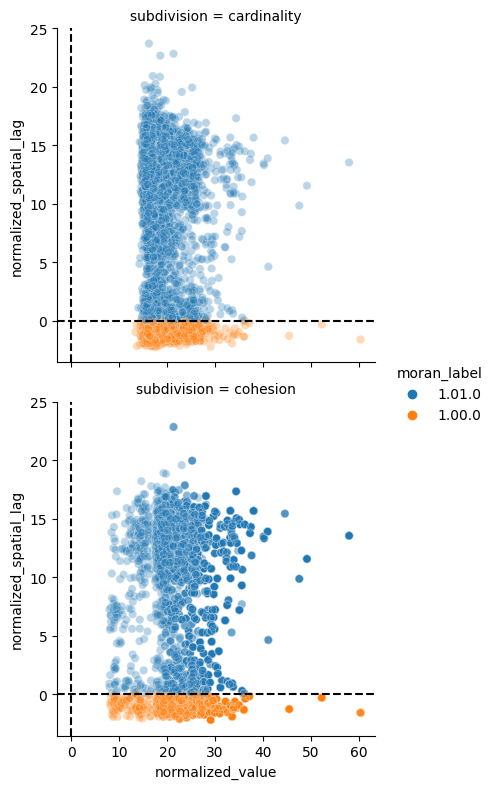

In [84]:
import pandas as pd

subdivisions = ["cardinality", "cohesion"]

base_config_ = base_config.copy()
base_config_["linearization"] = "numeric"

pl = Pipeline(base_config)

df = pd.DataFrame()

for subdivision in subdivisions:
  config = base_config_.copy()
  config["subdivision"] = subdivision
  pl.update_subdivision(subdivision)

  chunk = pd.DataFrame(pl.get_next_chunk(10000), columns=columns)
  chunk["linearization"] = config["linearization"]
  chunk["subdivision"] = config["subdivision"]
  chunk["selection"] = config["selection"]

  df = pd.concat([df, chunk], ignore_index=True)

render_chunk(df, "subdivision")

Changing the Selection 

preprocessing pipeline ...
Done with the pre-processing


C:\Users\au629923\AppData\Local\Temp\ipykernel_4244\785599636.py:50: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


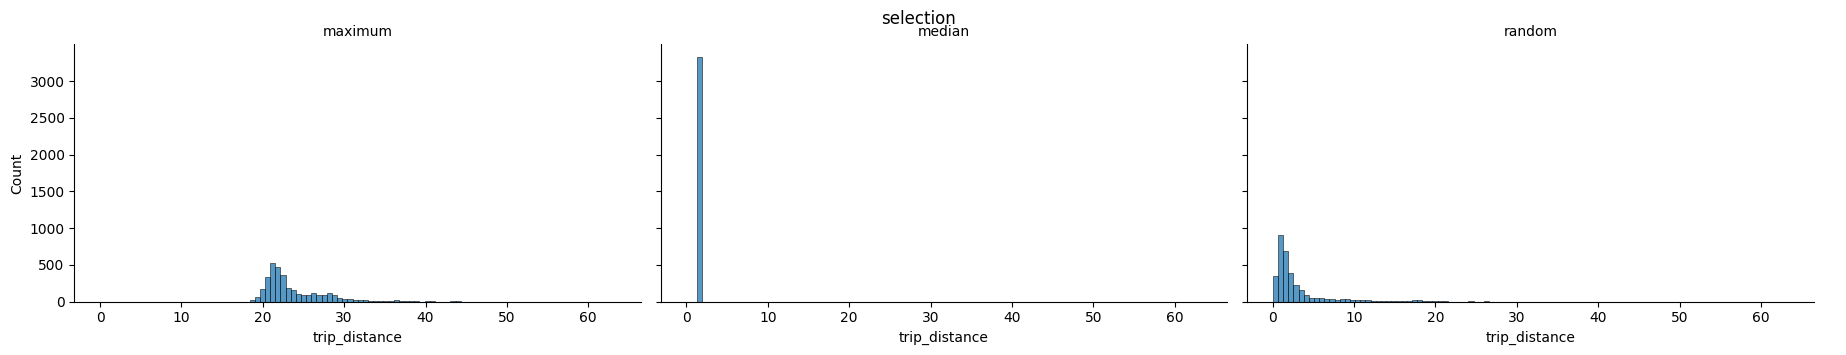

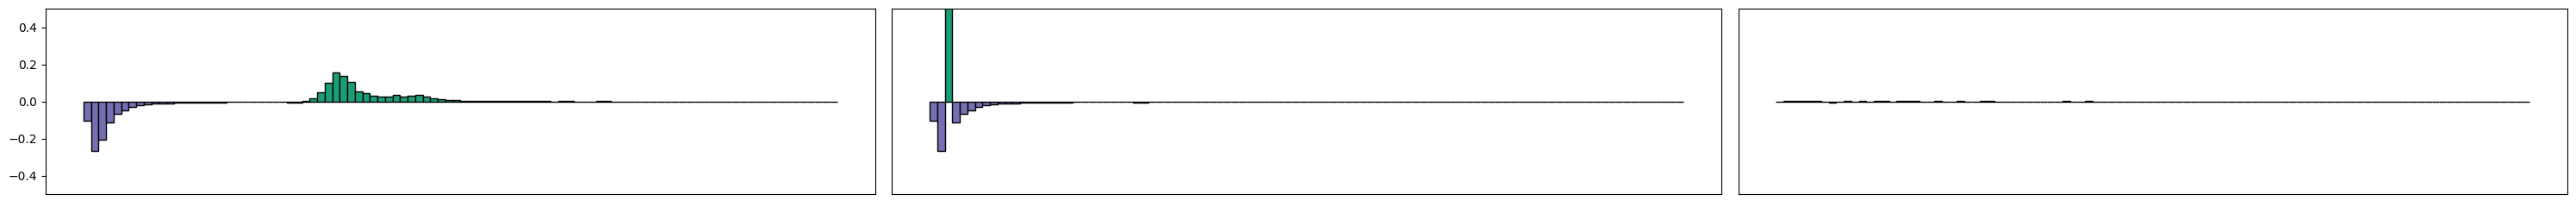

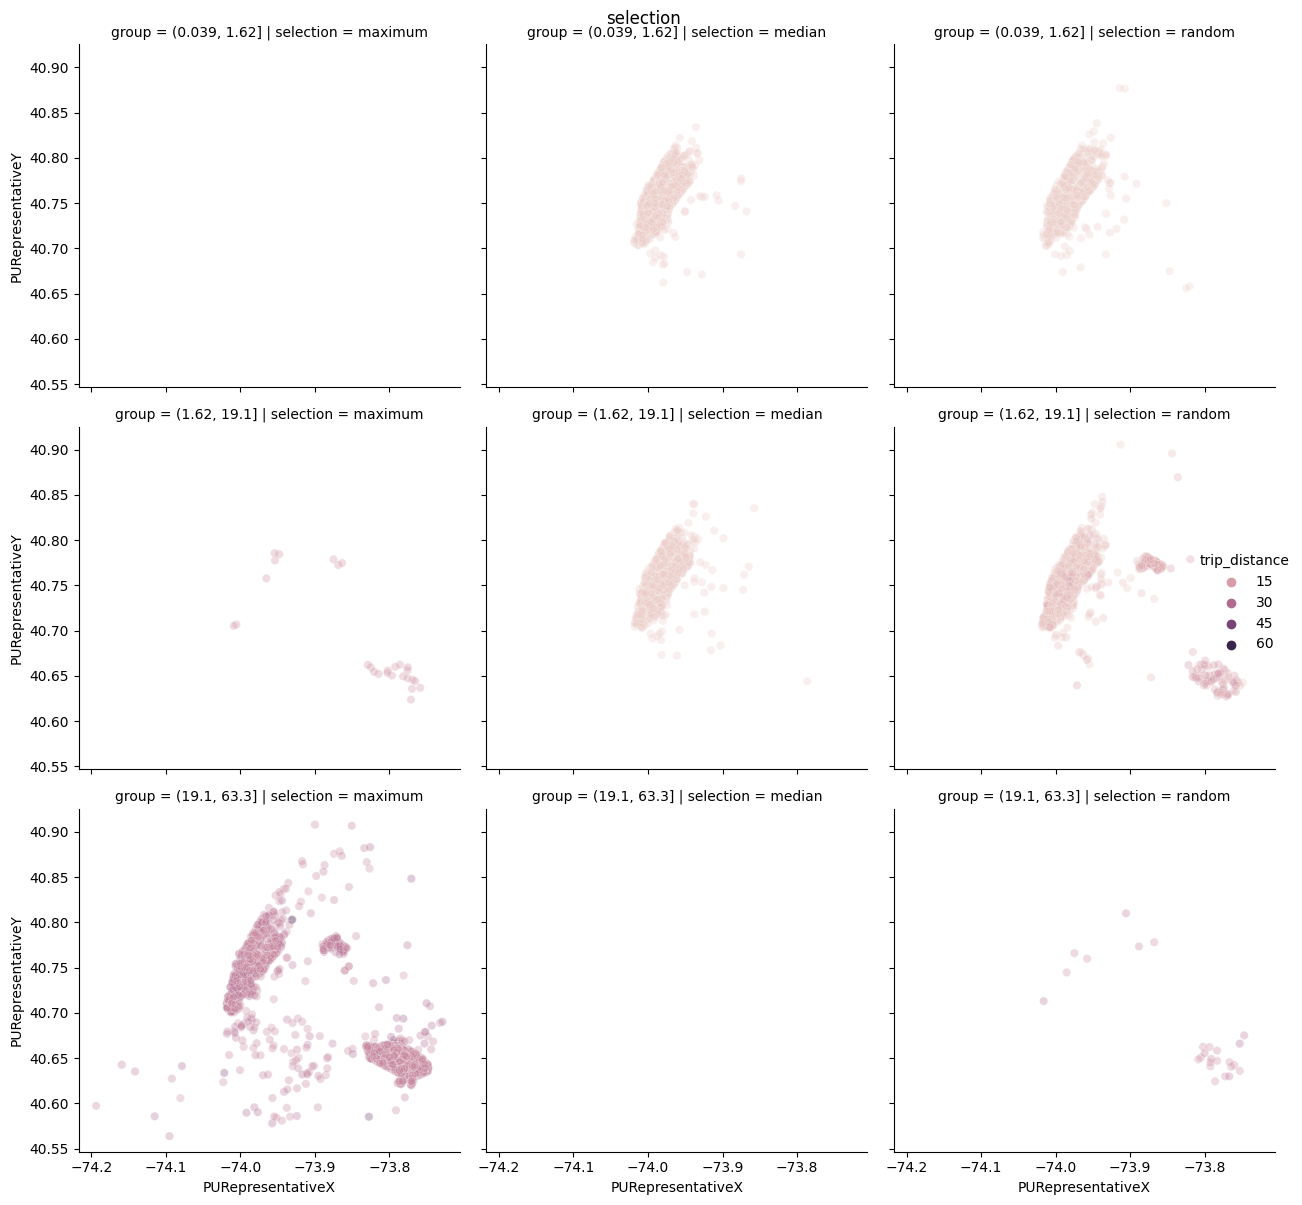

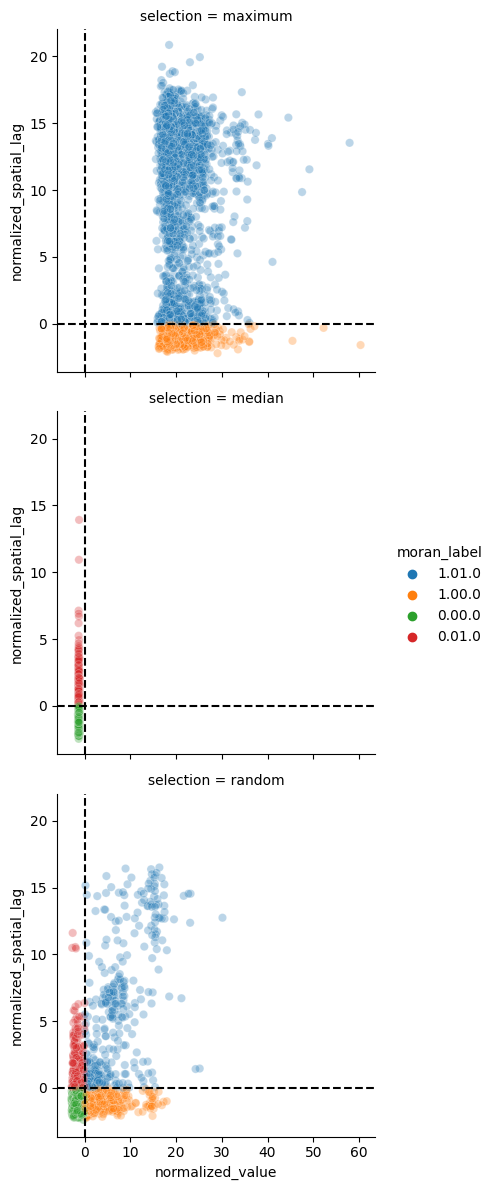

In [82]:
import pandas as pd

selections = ["maximum", "median", "random"]

base_config_ = base_config.copy()

pl = Pipeline(base_config)

df = pd.DataFrame()

for selection in selections:
  config = base_config.copy()
  config["selection"] = selection
  pl.update_selection(selection)

  chunk = pd.DataFrame(pl.get_next_chunk(3333), columns=columns)
  chunk["linearization"] = config["linearization"]
  chunk["subdivision"] = config["subdivision"]
  chunk["selection"] = config["selection"]

  df = pd.concat([df, chunk], ignore_index=True)

render_chunk(df, "selection")

Effect of changing chunk size on selection runtime

In [42]:
import pandas as pd
import time

start = time.time()
config = base_config.copy()
config["subdivision"] = "cohesion"  # creates "uneven" number of bins
config["selection"] = "median"  # complex selection strategy

pl = Pipeline(config)
print(f"preprocessing took {time.time() - start}s")

chunk_sizes = [100, 313, 1000, 1763, 2000, 5000, 10000, 56721, 100000]

runtimes = []

for chunk_size in chunk_sizes:
  now = time.time()
  chunk = pd.DataFrame(pl.get_next_chunk(chunk_size), columns=columns)
  runtime = time.time() - now
  runtimes += [(chunk_size, runtime)]

print("\ntotal", time.time() - start)
pd.DataFrame(runtimes, columns=["chunk_size", "runtime"])

preprocessing pipeline ...


KeyboardInterrupt: 

### Reproducing sampling strategies

preprocessing pipeline ...
Done with the pre-processing
got 10000 items
preprocessing pipeline ...
Done with the pre-processing
got 10000 items
preprocessing pipeline ...
Done with the pre-processing
got 10000 items
preprocessing pipeline ...
Done with the pre-processing
got 10000 items


C:\Users\au629923\AppData\Local\Temp\ipykernel_4244\2799233200.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


NameError: name 'sample_df' is not defined

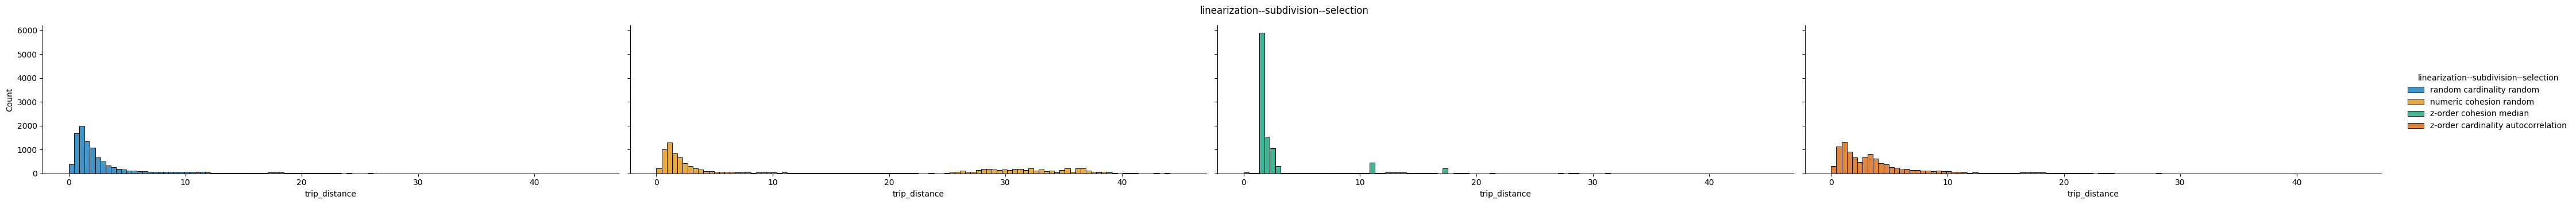

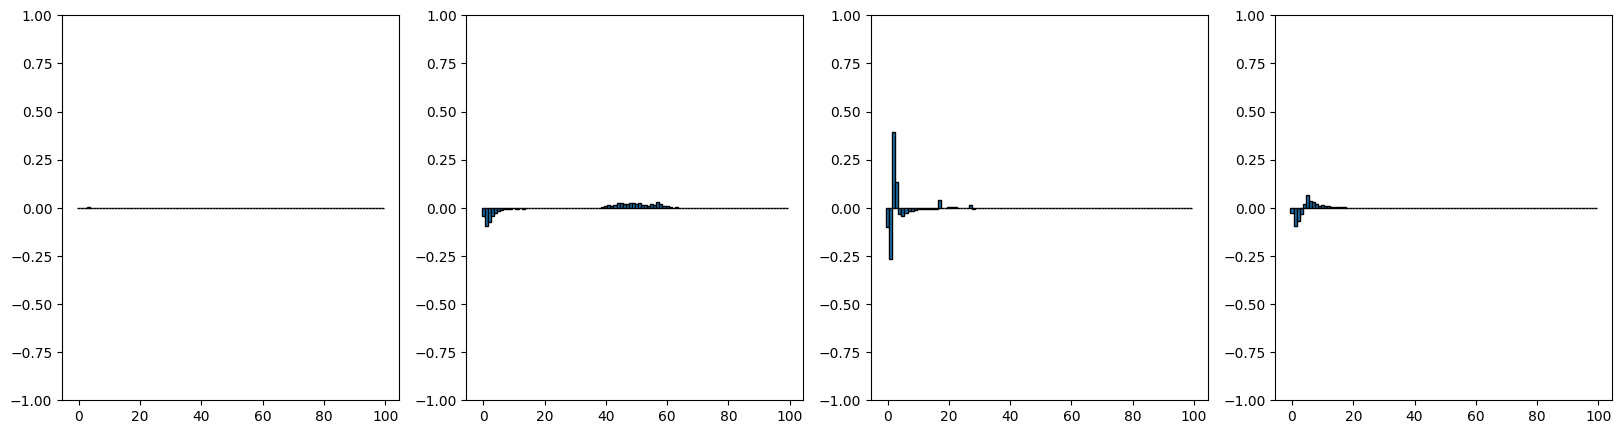

In [18]:
import pandas as pd

random_config = {
  "data": "taxis",
  "linearization": "random",
  "subdivision": "cardinality",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [17, 18],  # pickup location
  }
}

stratified_config = {
  "data": "taxis",
  "linearization": "numeric",
  "subdivision": "cohesion",
  "selection": "random",
  "dimension": 5,
  "params": {
    "subspace": [5],
    "value_h_index": 23,
    "lag_h_index": 24
  }
}

z_order_config = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cohesion",
  "selection": "median",
  "dimension": 5,  # spatial autocorrelation
  "params": {
    "subspace": [17, 18],  # pickup location
  }
}

autocorrelation_config = {
  "data": "taxis",
  "linearization": "z-order",
  "subdivision": "cardinality",
  "selection": "autocorrelation",
  "dimension": 5,  # spatial autocorrelation
  "params": {
    "subspace": [17, 18],  # pickup location
    "value_h_index": 23,
    "lag_h_index": 24
  }
}

combinations = [
  ("base", random_config),
  ("stratified", stratified_config),
  ("z-order", z_order_config),
  ("autocorrelation", autocorrelation_config),
]

df = pd.DataFrame()

for name, config in combinations:
  pl = Pipeline(config)

  chunk = pd.DataFrame(pl.get_next_chunk(10000), columns=columns)
  print(f"got {len(chunk)} items")
  
  chunk["linearization"] = config["linearization"]
  chunk["subdivision"] = config["subdivision"]
  chunk["selection"] = config["selection"]

  df = pd.concat([df, chunk], ignore_index=True)

render_chunk(df, ["linearization", "subdivision", "selection"])